### Fitbod Homework

In [650]:
import csv
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [1395]:
sns.set(style='white')
sns.set(rc={'figure.figsize':(20,10)})

In [1085]:
df=pd.read_csv('fitbod_HongLei_20200811-174911.csv')

##### check basic information

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          21353 non-null  object 
 1   workoutId     21353 non-null  object 
 2   exerciseId    21353 non-null  object 
 3   singleSetId   21353 non-null  object 
 4   exerciseName  21353 non-null  object 
 5   reps          21353 non-null  int64  
 6   weight        21353 non-null  float64
 7   fake_user_id  21353 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


##### check null values -- no null values, good

In [654]:
df.isnull().sum()

Date            0
workoutId       0
exerciseId      0
singleSetId     0
exerciseName    0
reps            0
weight          0
fake_user_id    0
dtype: int64

##### understand the data a little bit 

In [60]:
df.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2020-01-11,ZnRiJZczlV,mnwUcsbS9T,EviwaE3MDQ,Barbell Bench Press,8,65.770972,fake_id_876
1,2019-09-06,zKEUD7tMot,G1mxtZtEs5,7GlAkHhyFP,Back Squat,6,45.000000,fake_id_852
2,2020-04-02,dUs8qGlDnF,52vo7F7CLd,UTDVH0eMpx,Close-Grip Bench Press,12,52.163185,fake_id_875
3,2019-09-02,YY5qaxudee,G1mxtZtEs5,cHHOwuFTMH,Back Squat,4,50.000000,fake_id_852
4,2020-04-20,Y5Jp9SGngT,h85ZOw37Wc,9O8JiH26eQ,Dumbbell Bench Press,12,2.267965,fake_id_948


##### filter one user for understanding

In [70]:
df[(df['fake_user_id']=='fake_id_876') & (df['workoutId']=='bmQvLbdqmr')].sort_values(by='Date',ascending=False)

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
2068,2020-07-10,bmQvLbdqmr,52vo7F7CLd,A5tXlMm7Yu,Close-Grip Bench Press,12,36.287433,fake_id_876
2645,2020-07-10,bmQvLbdqmr,52vo7F7CLd,xpEHJkqmsr,Close-Grip Bench Press,12,36.287433,fake_id_876
8396,2020-07-10,bmQvLbdqmr,mnwUcsbS9T,Dg0PFyuiB9,Barbell Bench Press,10,56.699114,fake_id_876
14232,2020-07-10,bmQvLbdqmr,mnwUcsbS9T,nScOZdYbVO,Barbell Bench Press,10,56.699114,fake_id_876
15875,2020-07-10,bmQvLbdqmr,52vo7F7CLd,8CSUFK02IE,Close-Grip Bench Press,12,36.287433,fake_id_876
16105,2020-07-10,bmQvLbdqmr,52vo7F7CLd,FtrVii4Cba,Close-Grip Bench Press,12,36.287433,fake_id_876


In [544]:
df[(df['fake_user_id']=='fake_id_876') & (df['exerciseId']=='52vo7F7CLd')].sort_values(by='Date',ascending=False).head(10)

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
20413,2020-08-09,ZbLqQ51Sm3,52vo7F7CLd,ITg18jRbnE,Close-Grip Bench Press,6,56.699114,fake_id_876
14515,2020-08-09,ZbLqQ51Sm3,52vo7F7CLd,WDZE9LYOJM,Close-Grip Bench Press,6,56.699114,fake_id_876
3094,2020-08-09,ZbLqQ51Sm3,52vo7F7CLd,GyenCJeIhA,Close-Grip Bench Press,6,56.699114,fake_id_876
16175,2020-08-09,ZbLqQ51Sm3,52vo7F7CLd,mr0QIzniQf,Close-Grip Bench Press,10,56.699114,fake_id_876
15875,2020-07-10,bmQvLbdqmr,52vo7F7CLd,8CSUFK02IE,Close-Grip Bench Press,12,36.287433,fake_id_876
2068,2020-07-10,bmQvLbdqmr,52vo7F7CLd,A5tXlMm7Yu,Close-Grip Bench Press,12,36.287433,fake_id_876
2645,2020-07-10,bmQvLbdqmr,52vo7F7CLd,xpEHJkqmsr,Close-Grip Bench Press,12,36.287433,fake_id_876
16105,2020-07-10,bmQvLbdqmr,52vo7F7CLd,FtrVii4Cba,Close-Grip Bench Press,12,36.287433,fake_id_876
12274,2020-07-04,CzIEHECqlR,52vo7F7CLd,ZQdgNhTRNp,Close-Grip Bench Press,8,45.359291,fake_id_876
10528,2020-07-04,CzIEHECqlR,52vo7F7CLd,eEwD1aqUFp,Close-Grip Bench Press,8,45.359291,fake_id_876


##### 1. workoutid is an id for a user using the app for a day including several exercises
##### 2. exerciseid is just an id for one unique exercise
##### 3. singlesetid is one particular exercise using a specific weight, working for several reps

##### add time variables

In [1086]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0       2020-01-11
1       2019-09-06
2       2020-04-02
3       2019-09-02
4       2020-04-20
           ...    
21348   2019-09-19
21349   2020-08-02
21350   2019-09-06
21351   2020-03-27
21352   2019-11-14
Name: Date, Length: 21353, dtype: datetime64[ns]

In [1087]:
df['DayName']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.to_period('M')
df['Quarter']=df['Date'].dt.to_period('Q')
df['Year']=df['Date'].dt.year

##### check for unique values

In [657]:
['column {} contains {} unique values '.format(i,df[i].nunique()) for i in df.columns]

['column Date contains 365 unique values ',
 'column workoutId contains 4484 unique values ',
 'column exerciseId contains 9 unique values ',
 'column singleSetId contains 21306 unique values ',
 'column exerciseName contains 9 unique values ',
 'column reps contains 42 unique values ',
 'column weight contains 256 unique values ',
 'column fake_user_id contains 138 unique values ',
 'column DayName contains 7 unique values ',
 'column Month contains 13 unique values ',
 'column Quarter contains 5 unique values ',
 'column Year contains 2 unique values ']

##### 138 users cross 9 exercises data for a year

##### general information

##### workout sessions overall year trend

Text(0.5, 1.0, 'Quartaly workout sessions')

<Figure size 7500x8250 with 0 Axes>

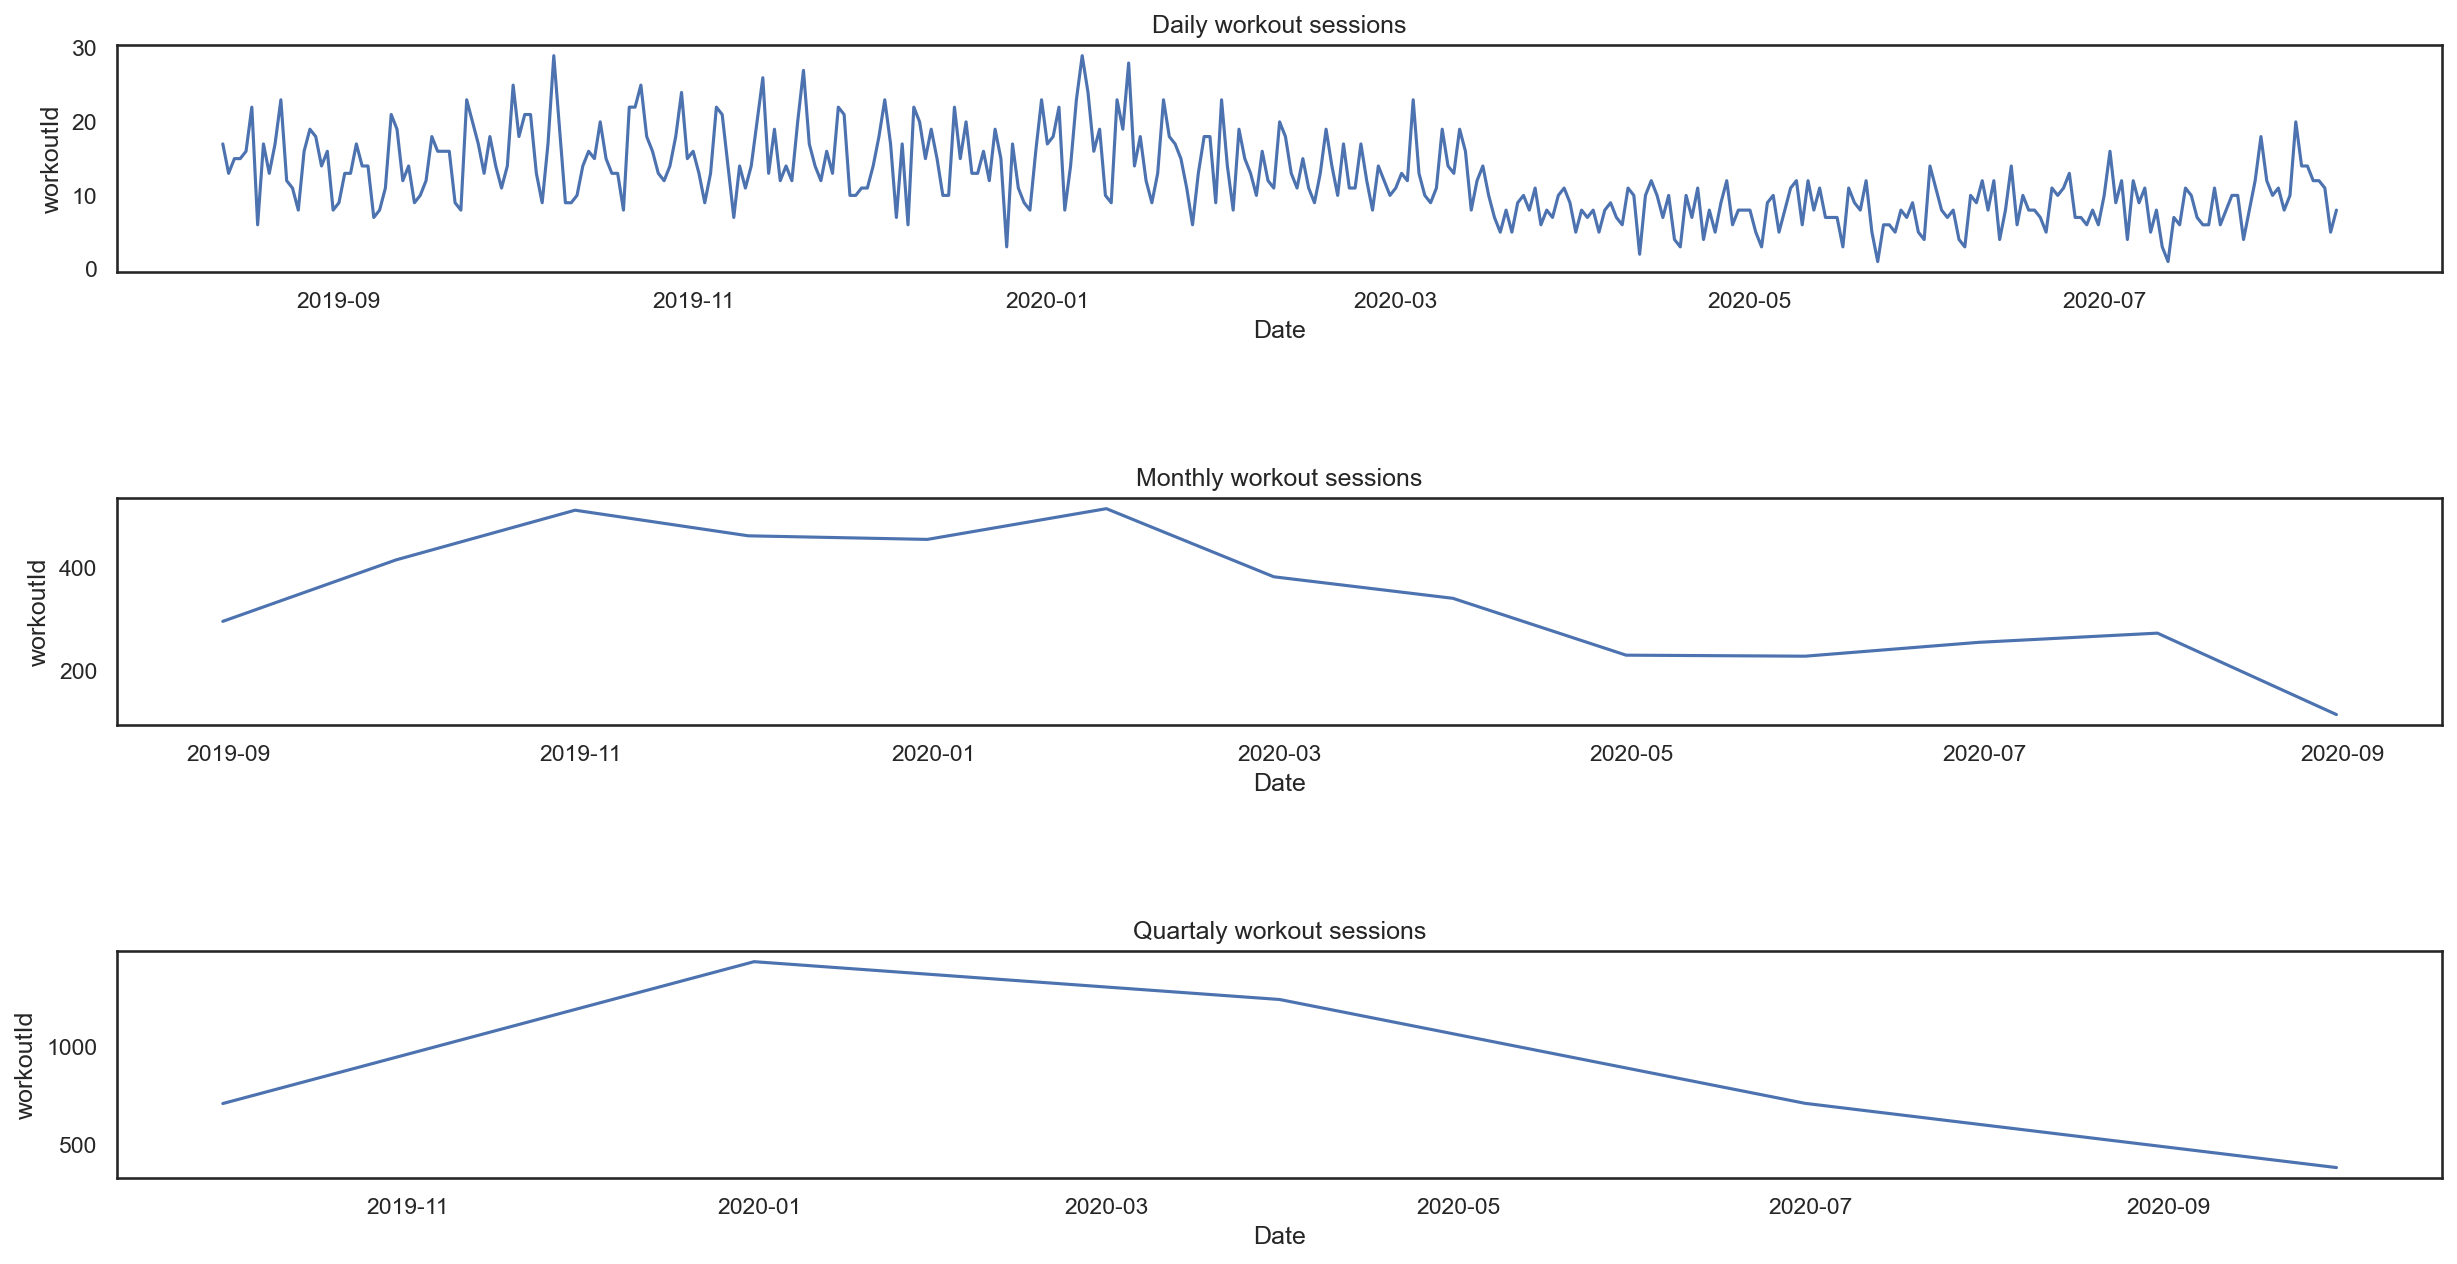

In [689]:
plt.figure(figsize=(50,55))
fig,axs=plt.subplots(nrows=3)
fig.subplots_adjust(hspace=1)
sns.set(style='white')

sns.lineplot(x='Date',y='workoutId',data=df.groupby('Date').workoutId.nunique().reset_index(),ax=axs[0])
axs[0].set_title('Daily workout sessions')

sns.lineplot(x='Date',y='workoutId',data=df.groupby('Date').workoutId.nunique().resample('M').sum().reset_index(),ax=axs[1])
axs[1].set_title('Monthly workout sessions')

sns.lineplot(x='Date',y='workoutId',data=df.groupby('Date').workoutId.nunique().resample('Q').sum().reset_index(),ax=axs[2])
axs[2].set_title('Quartaly workout sessions')

##### The workout sessions have been declining since Mar 2020.

In [697]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday=df.groupby(['Date','DayName','Month']).workoutId.nunique().reset_index()

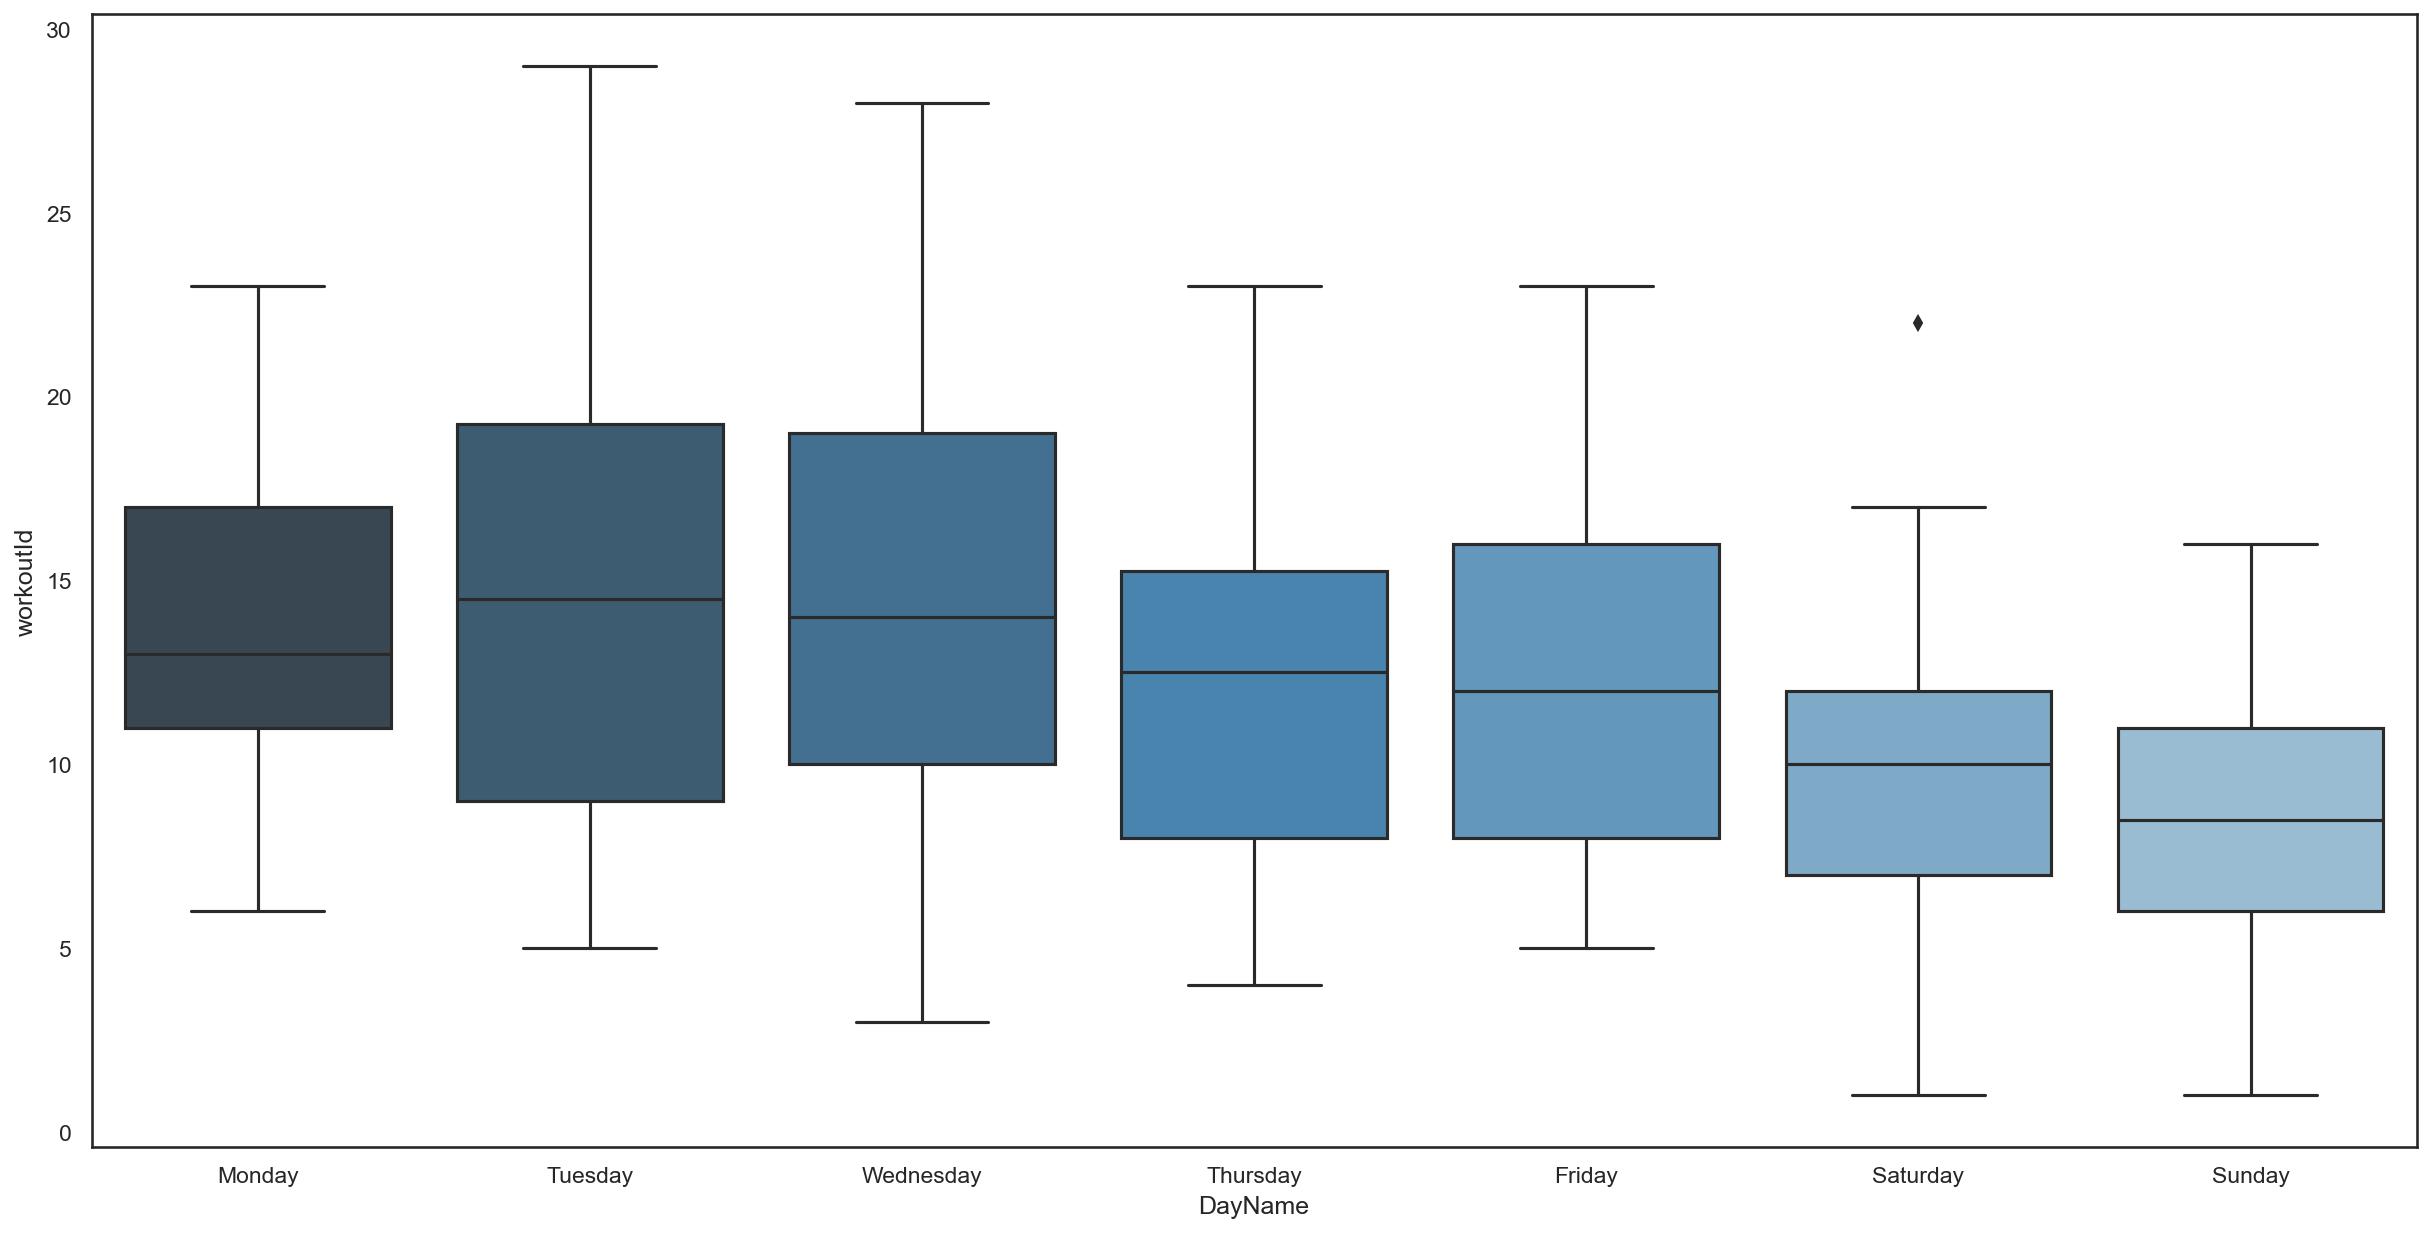

In [698]:
sns.boxplot(x='DayName',y='workoutId',data=df_weekday,palette="Blues_d")

##### People tend to workout at workdays more than weekends, but with higher variations.

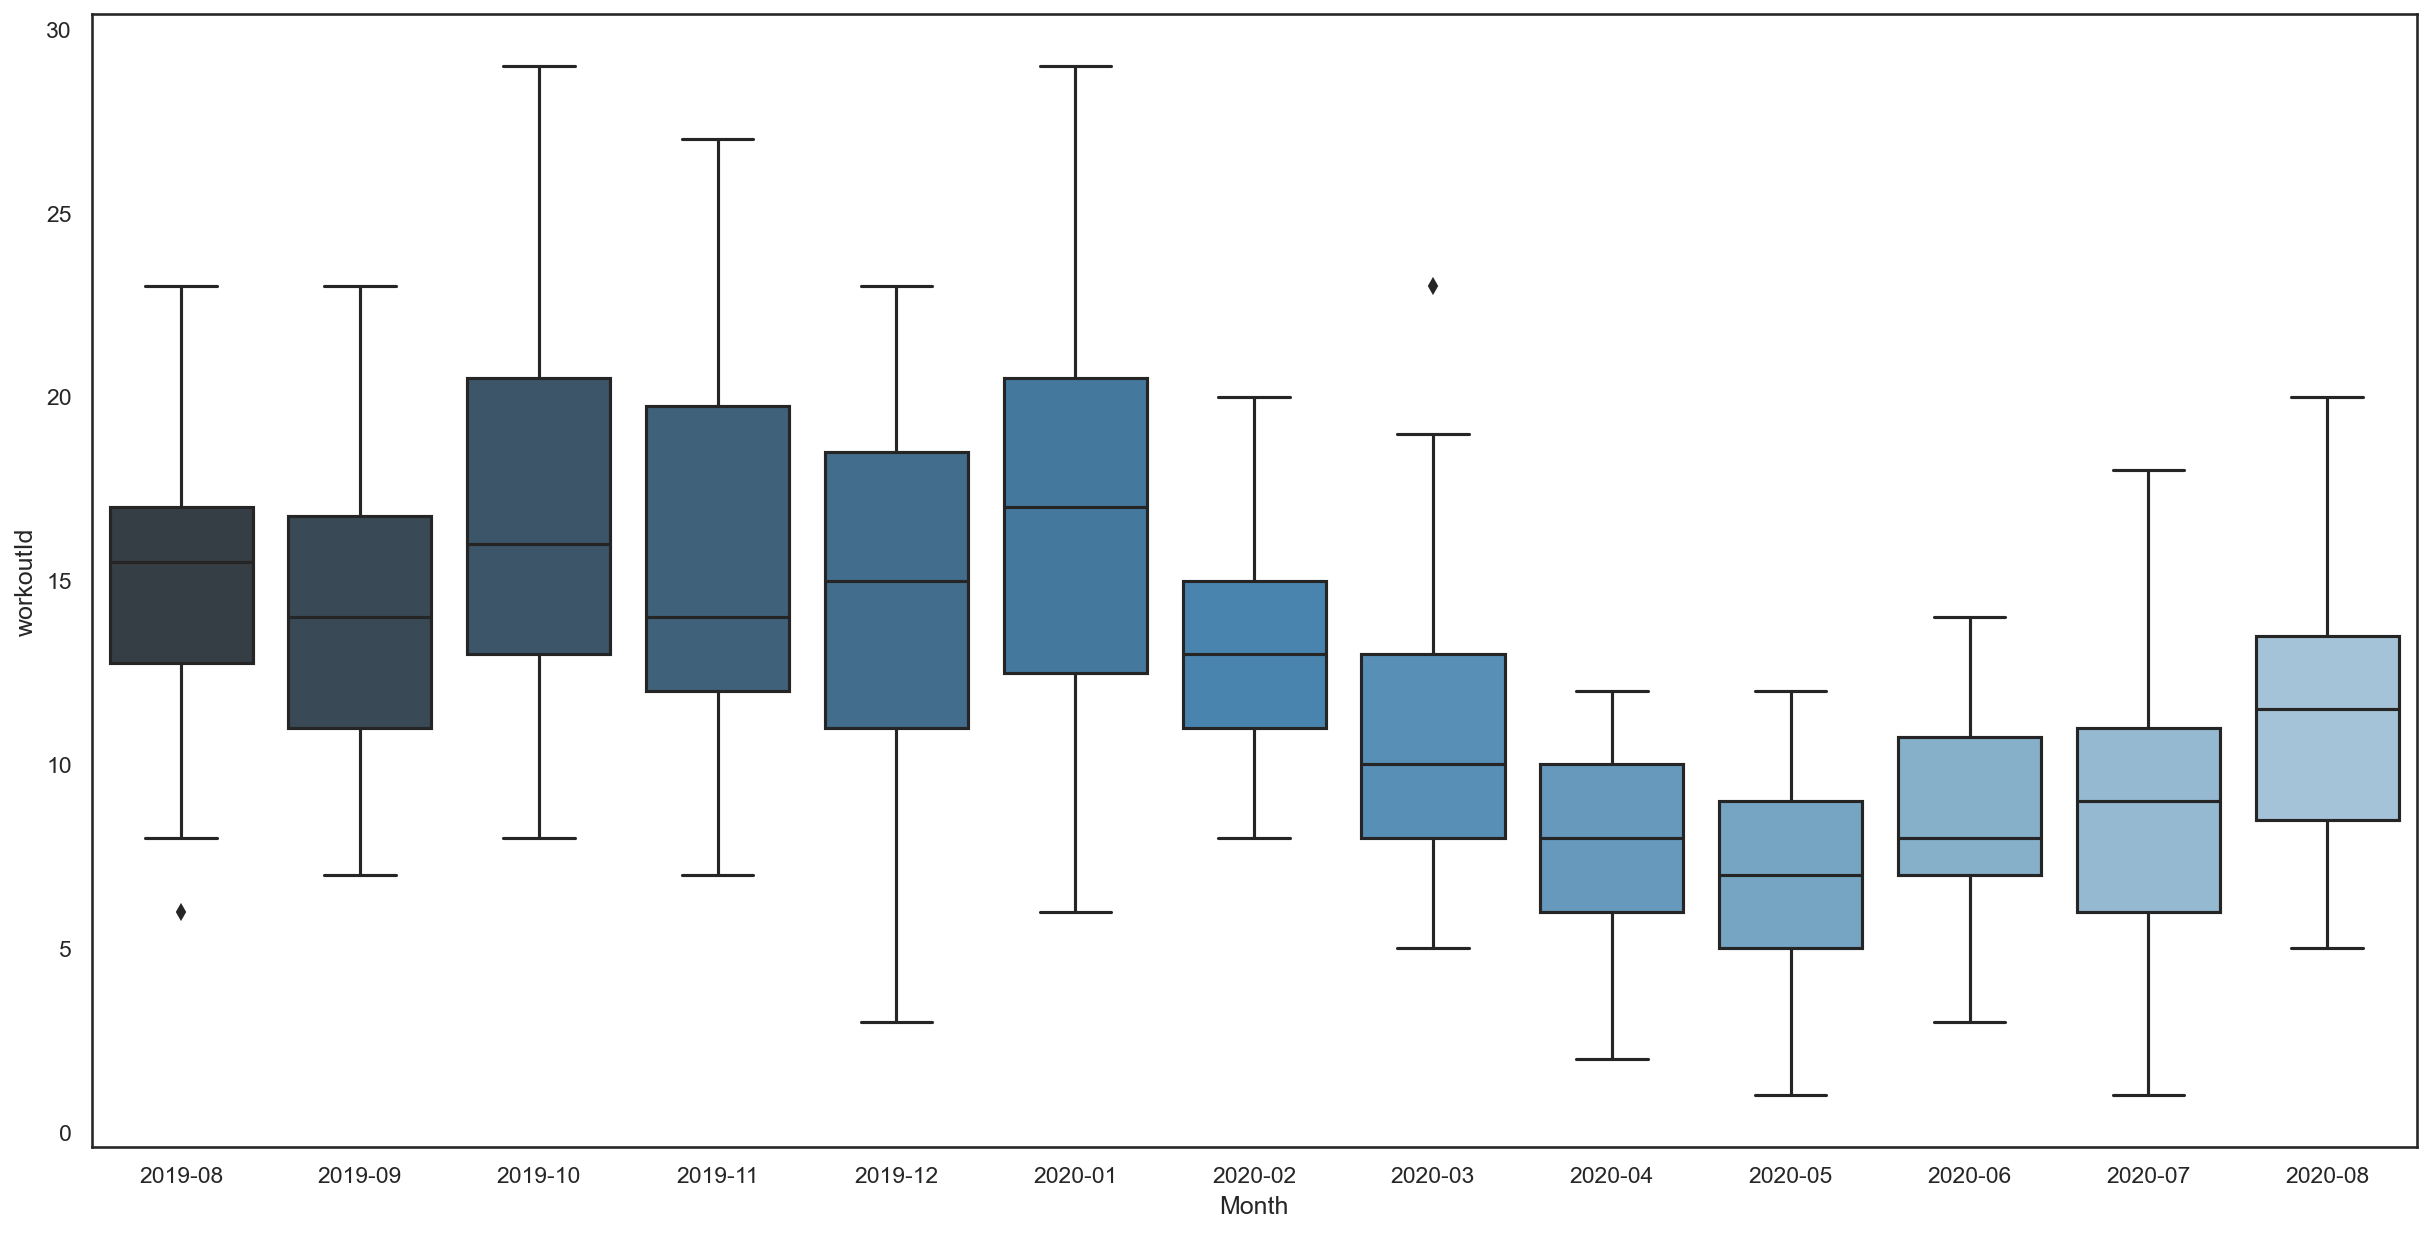

In [1398]:
sns.boxplot(x='Month',y='workoutId',data=df_weekday,palette="Blues_d")

##### it seems that people tend to use less the work-out app during spring and summer than autumn and winter, which is quite different from what i have in mind. Not sure whether this trend was influenced by covid19. However,  the variance of autumn and winter is quite large comparing to spring and summer.

##### let us take a look at user trend

Text(0.5, 1.0, 'Quartaly users')

<Figure size 7500x8250 with 0 Axes>

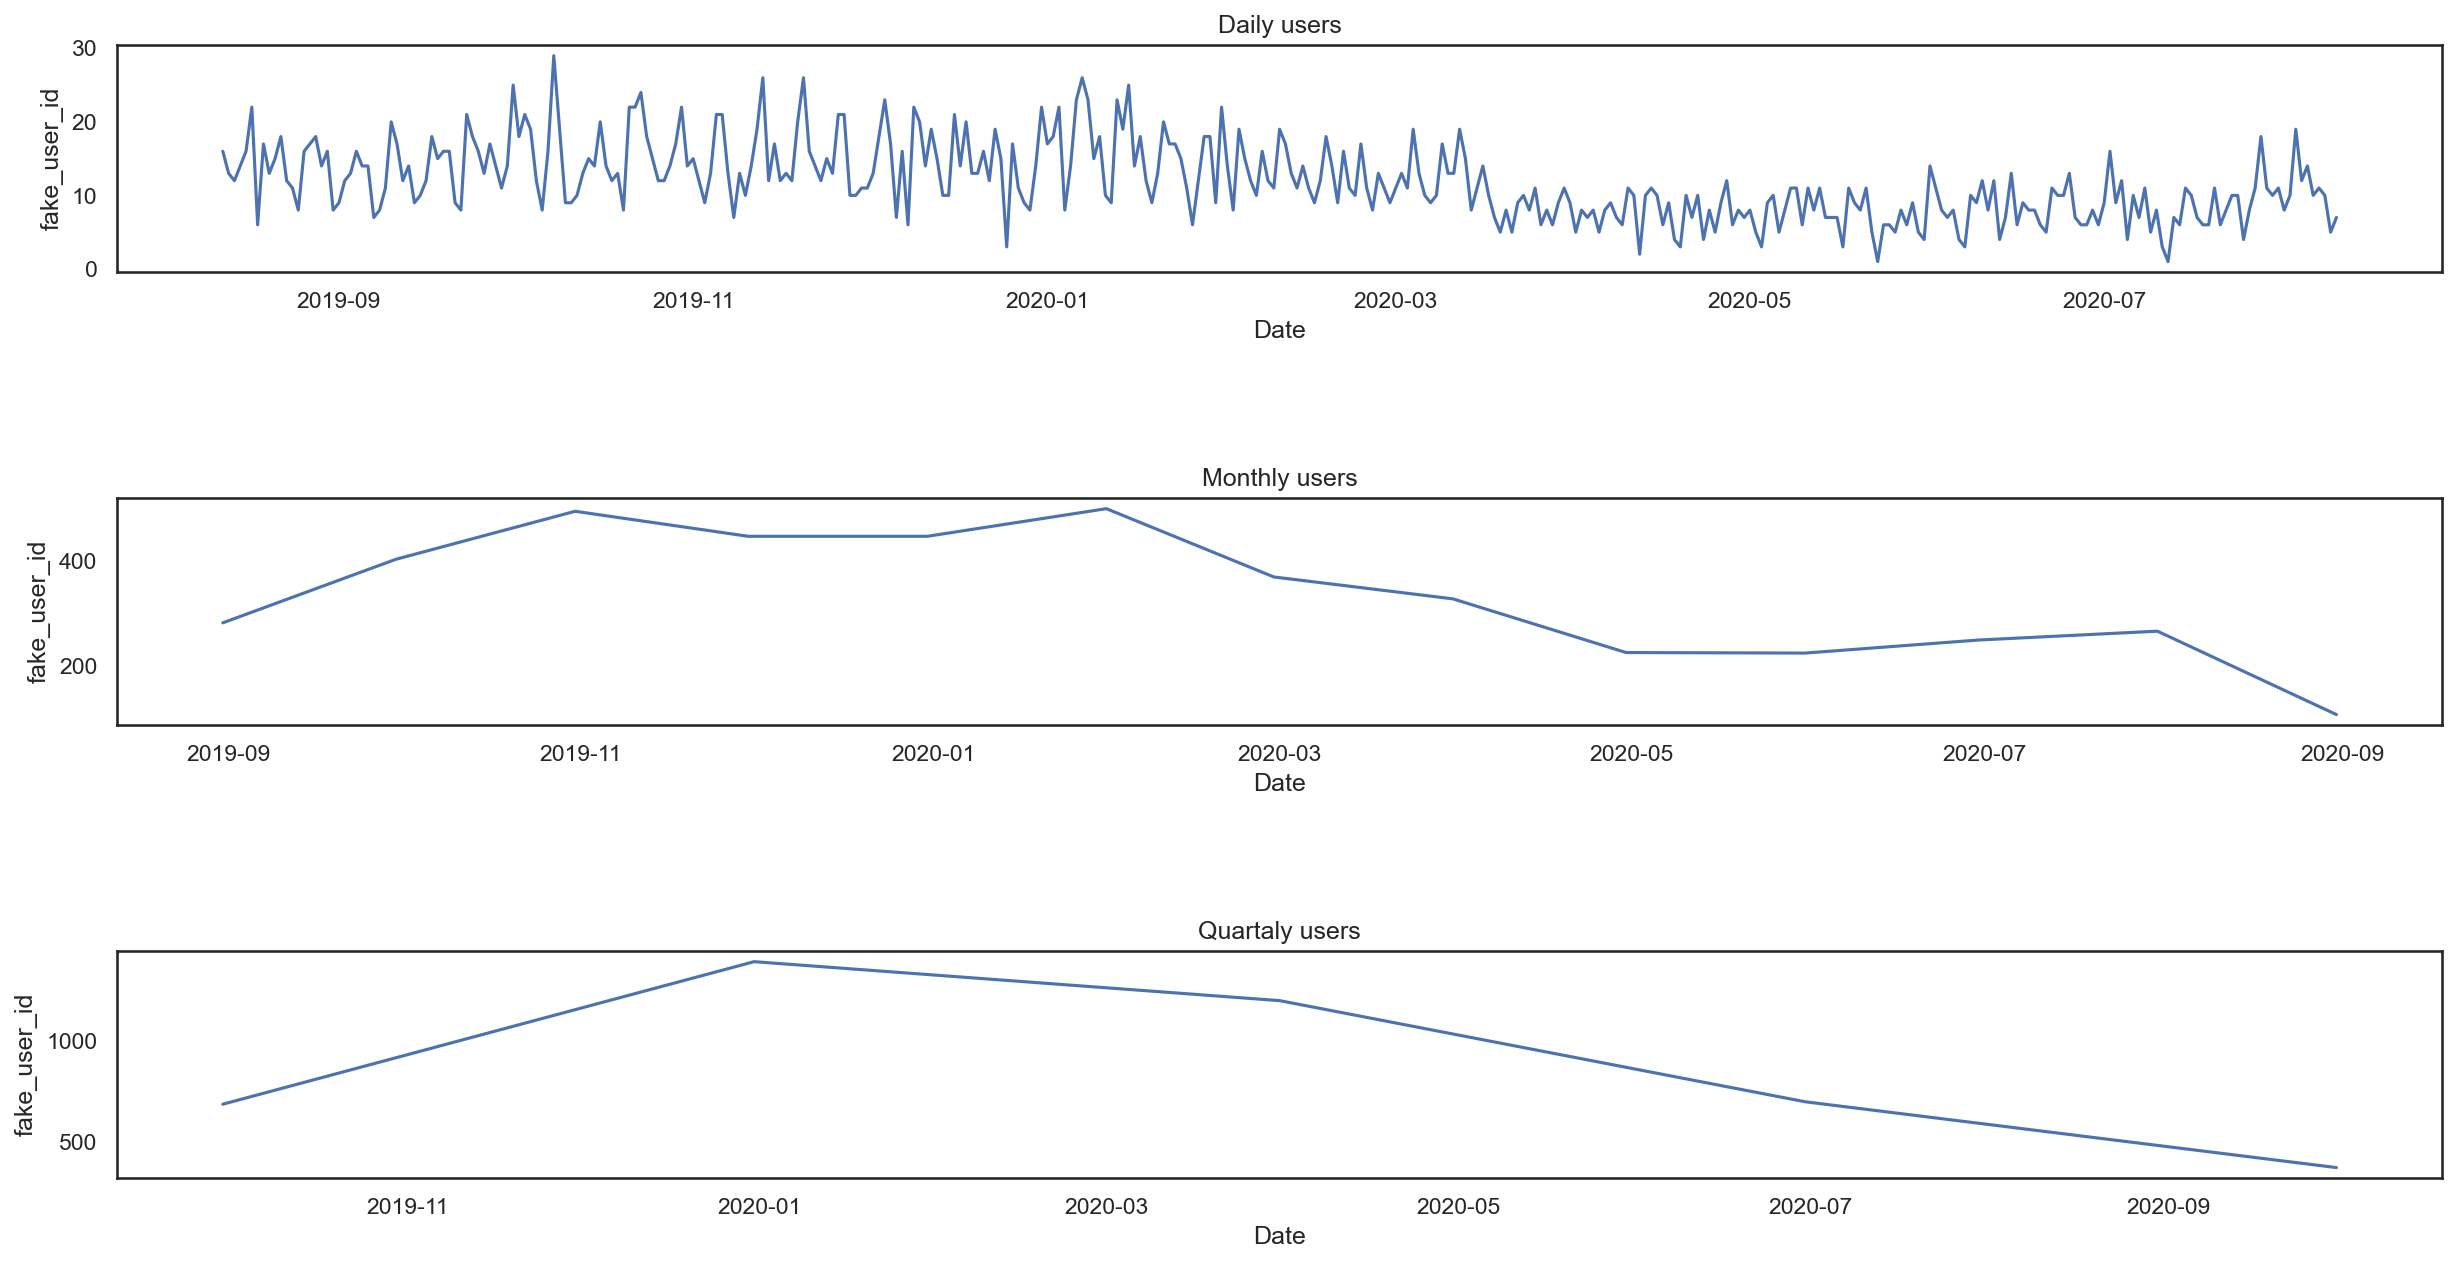

In [696]:
plt.figure(figsize=(50,55))
fig,axs=plt.subplots(nrows=3)
fig.subplots_adjust(hspace=1)

sns.lineplot(x='Date',y='fake_user_id',data=df.groupby('Date').fake_user_id.nunique().reset_index(),ax=axs[0])
axs[0].set_title('Daily users')

sns.lineplot(x='Date',y='fake_user_id',data=df.groupby('Date').fake_user_id.nunique().resample('M').sum().reset_index(),ax=axs[1])
axs[1].set_title('Monthly users')

sns.lineplot(x='Date',y='fake_user_id',data=df.groupby('Date').fake_user_id.nunique().resample('Q').sum().reset_index(),ax=axs[2])
axs[2].set_title('Quartaly users')

In [701]:
df_weekday_user=df.groupby(['Date','DayName','Month']).fake_user_id.nunique().reset_index()

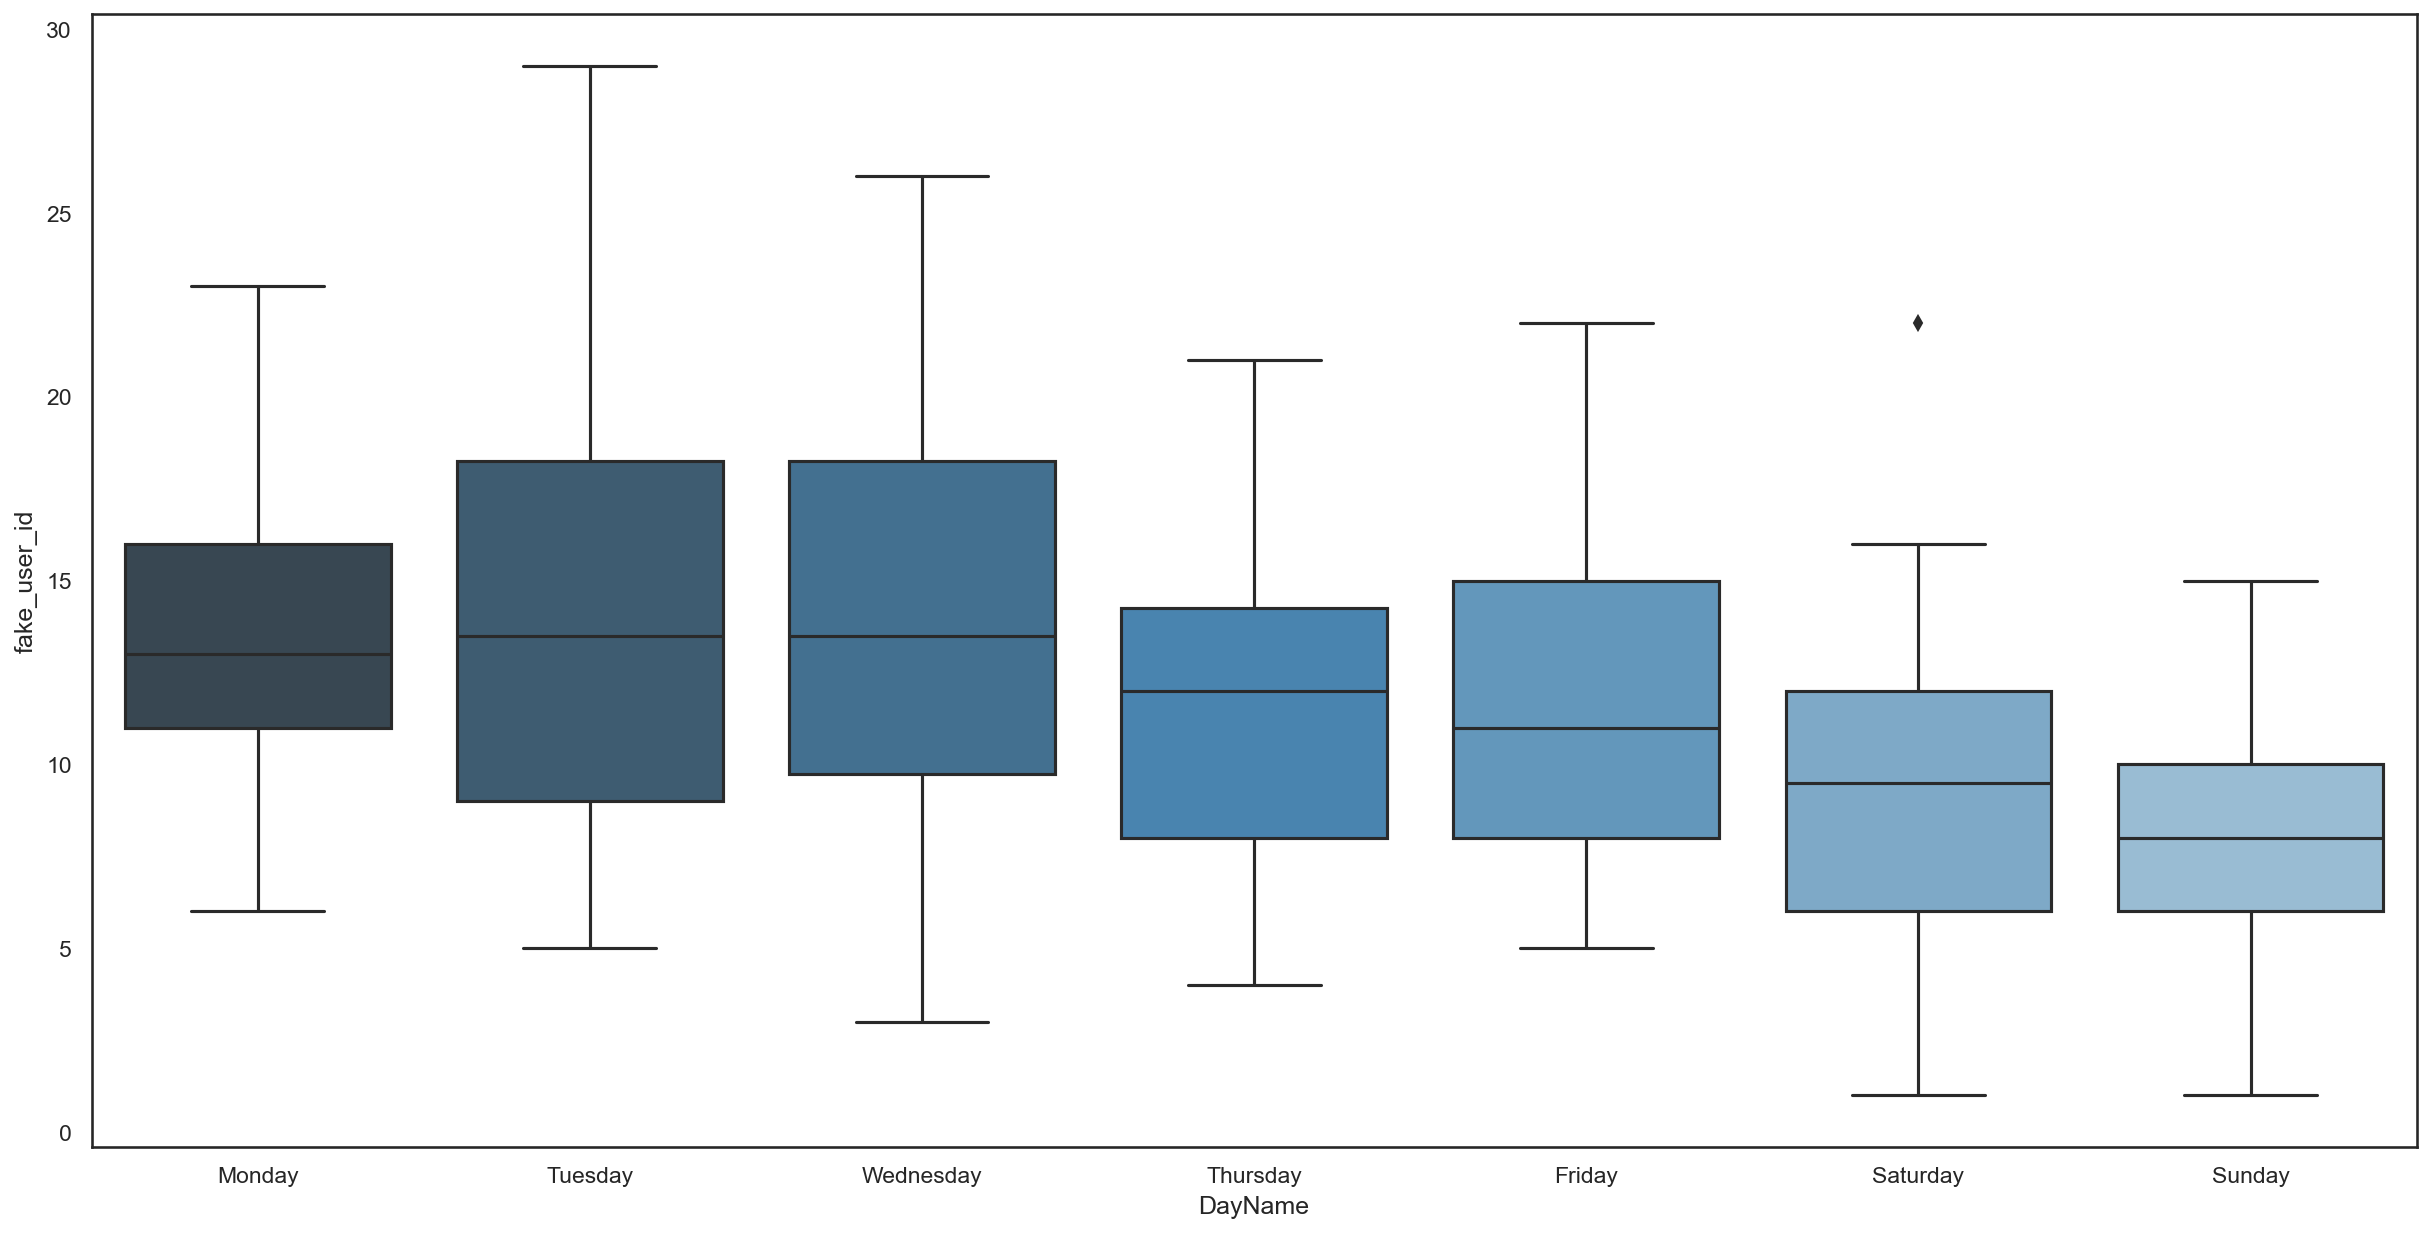

In [702]:
sns.boxplot(x='DayName',y='fake_user_id',data=df_weekday_user,palette="Blues_d")

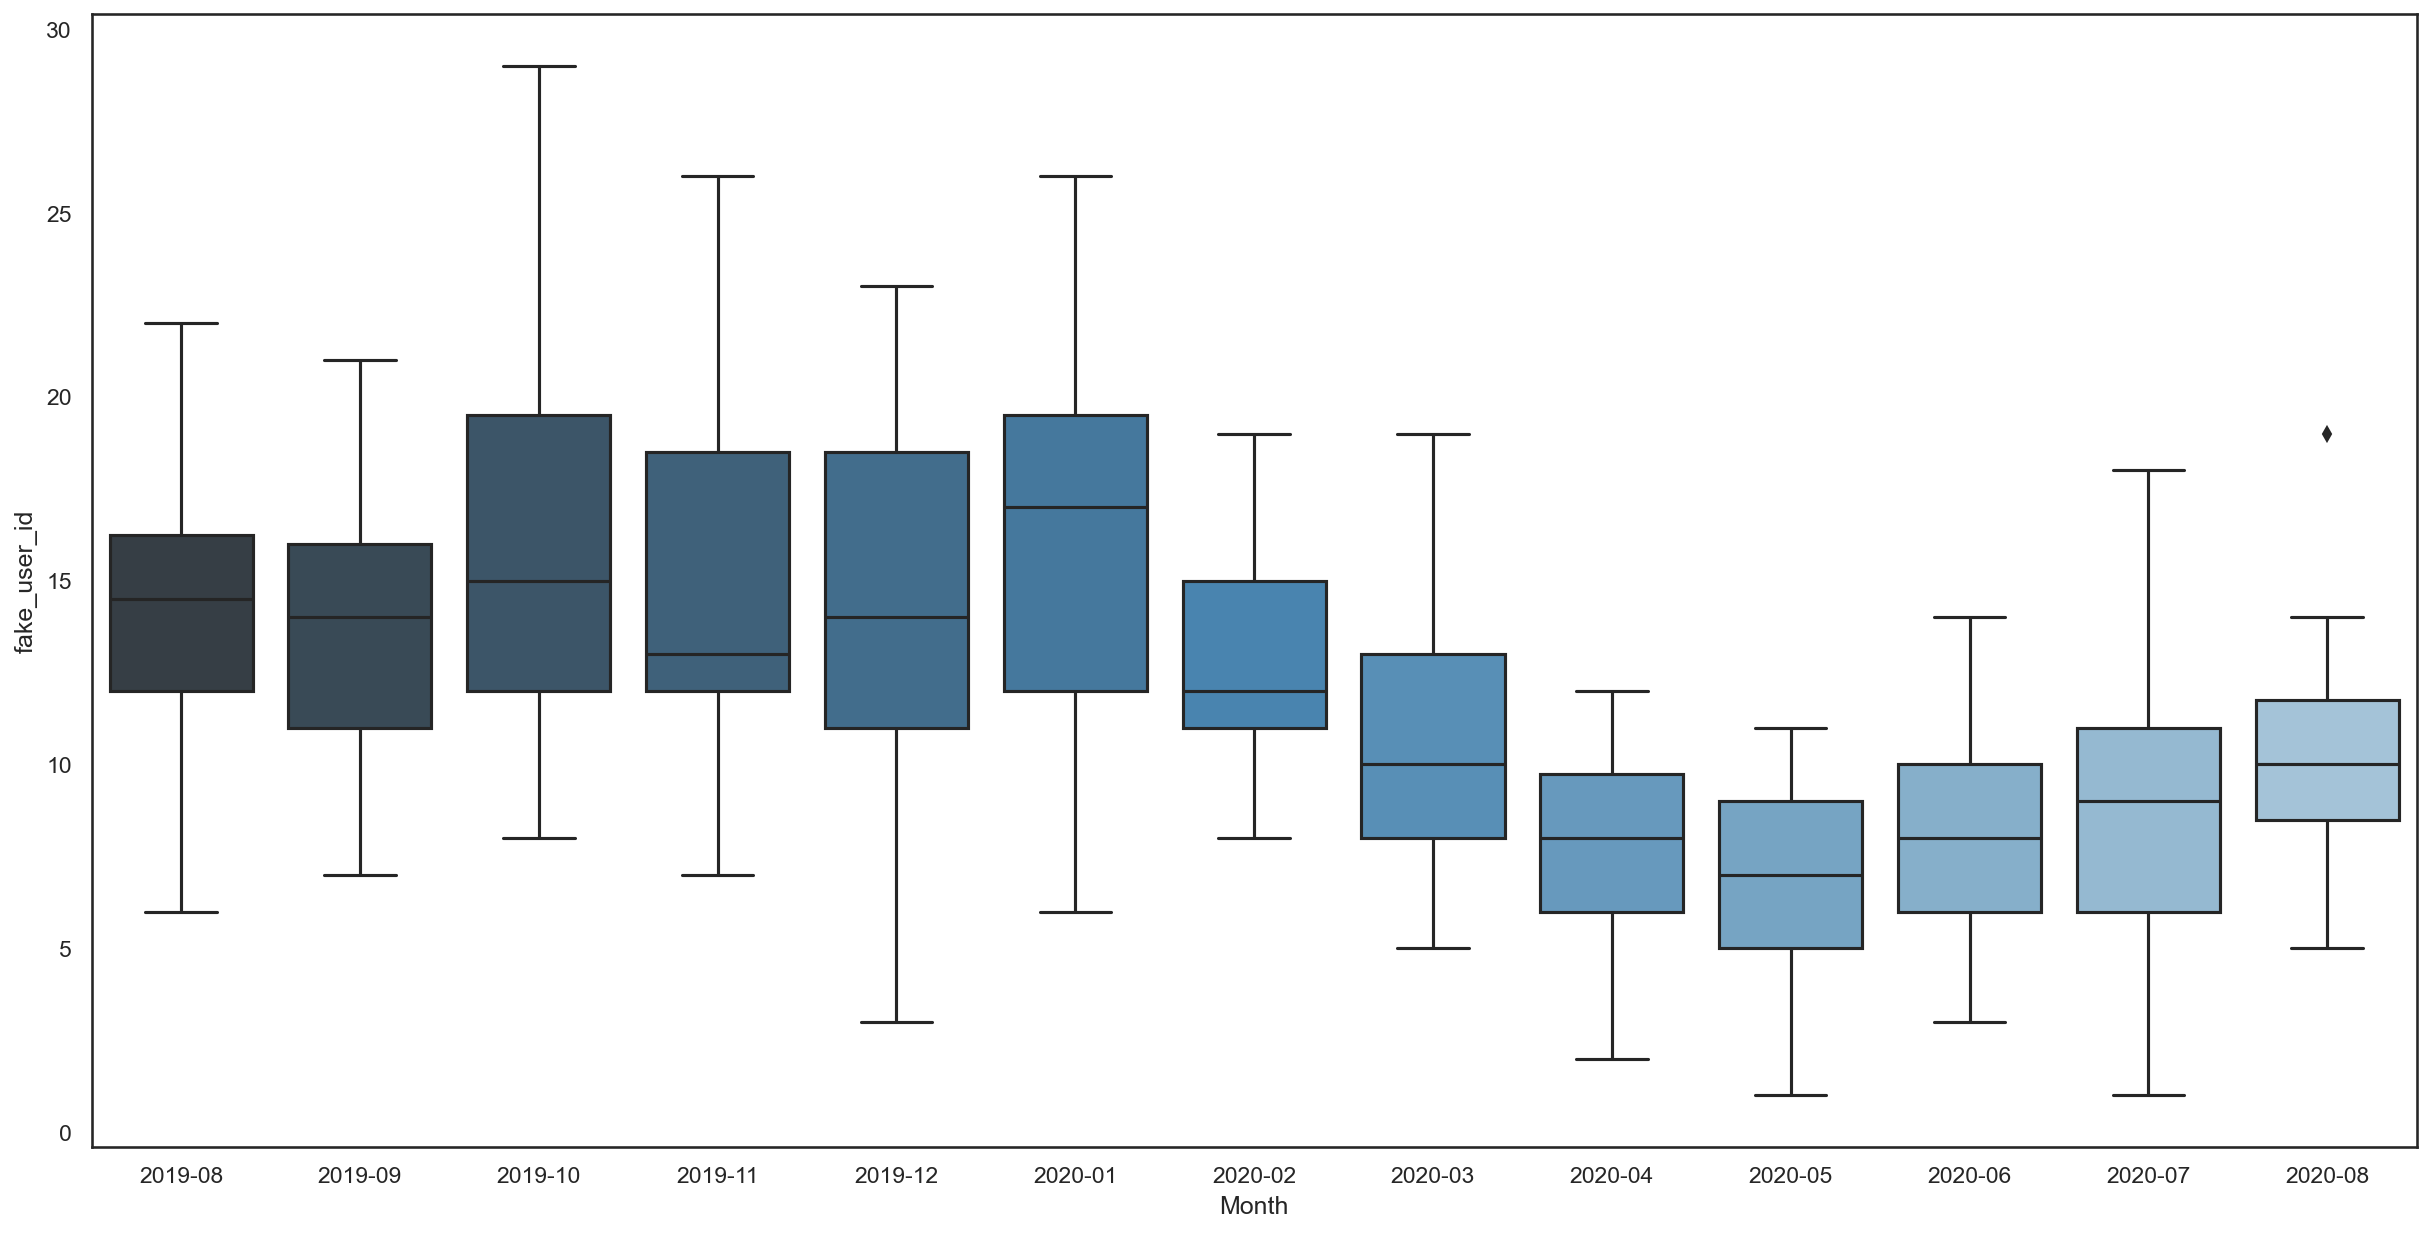

In [703]:
sns.boxplot(x='Month',y='fake_user_id',data=df_weekday_user,palette="Blues_d")

##### The amount of users has also been declining since Mar 2020 and follows the same pattern as workout trends.

Should we have the demographic data, we could understand what 

##### Exercises

In [801]:
df.exerciseName.value_counts().sort_values()

Dumbbell Lunge             1334
Dumbbell Bent Over Row     1541
Close-Grip Bench Press     1699
Back Squat                 2235
Deadlift                   2419
Dumbbell Shoulder Press    2620
Dumbbell Bench Press       2692
Dumbbell Row               3186
Barbell Bench Press        3627
Name: exerciseName, dtype: int64

Text(0.5, 1.0, 'Exercises Break Down')

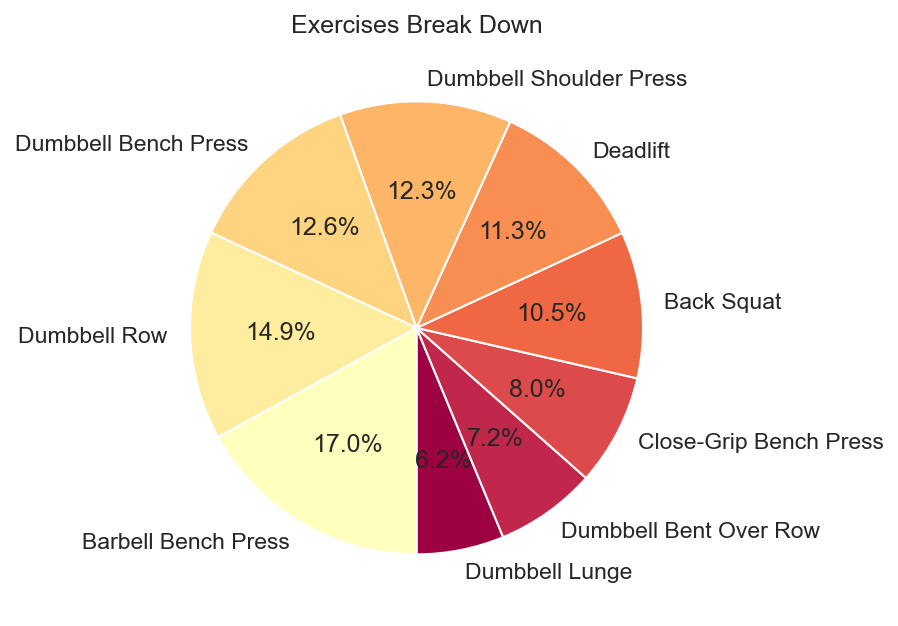

In [1280]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0,0.5,9)]
df.exerciseName.value_counts().sort_values().plot.pie(y='exerciseName', figsize=(5,5), autopct='%1.1f%%', startangle=270,colors=colors)
plt.ylabel('')
plt.title('Exercises Break Down')

##### Barbell Bench Press is the most popular one and dumbbell lunge is the least popular one.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d5980450>,
      dtype=object)

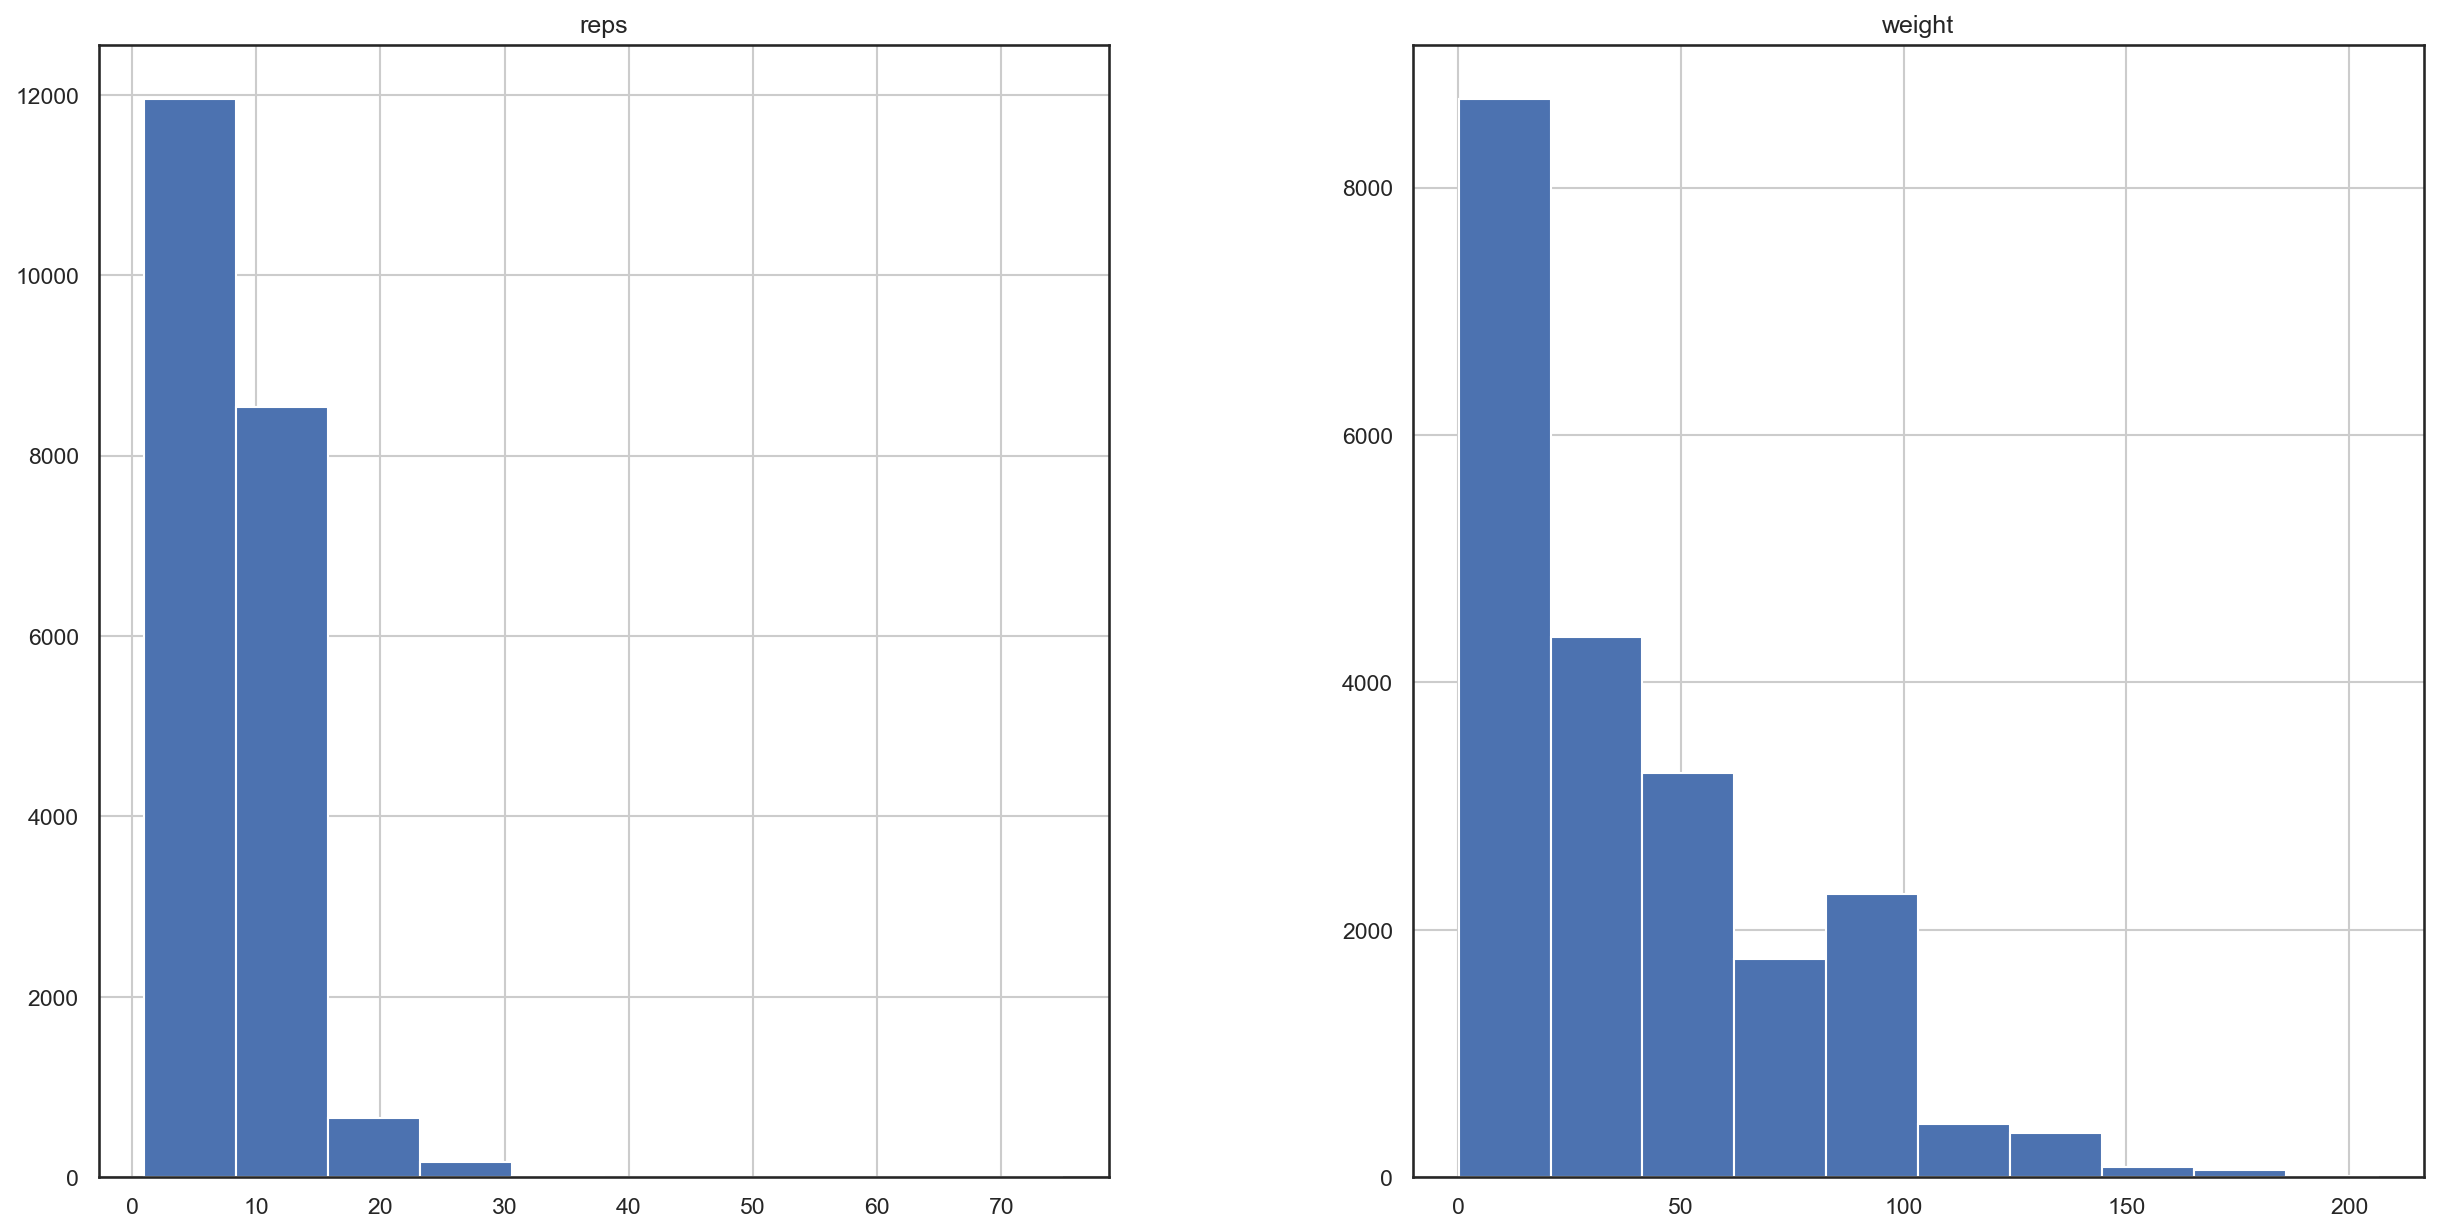

In [714]:
df[['reps','weight']].hist()

##### people mostly do 1-15 reps a time, but rarely exceed 30 reps.

##### Most of the users lie in 1-25 weights bucket

##### Exercises attributes distribution

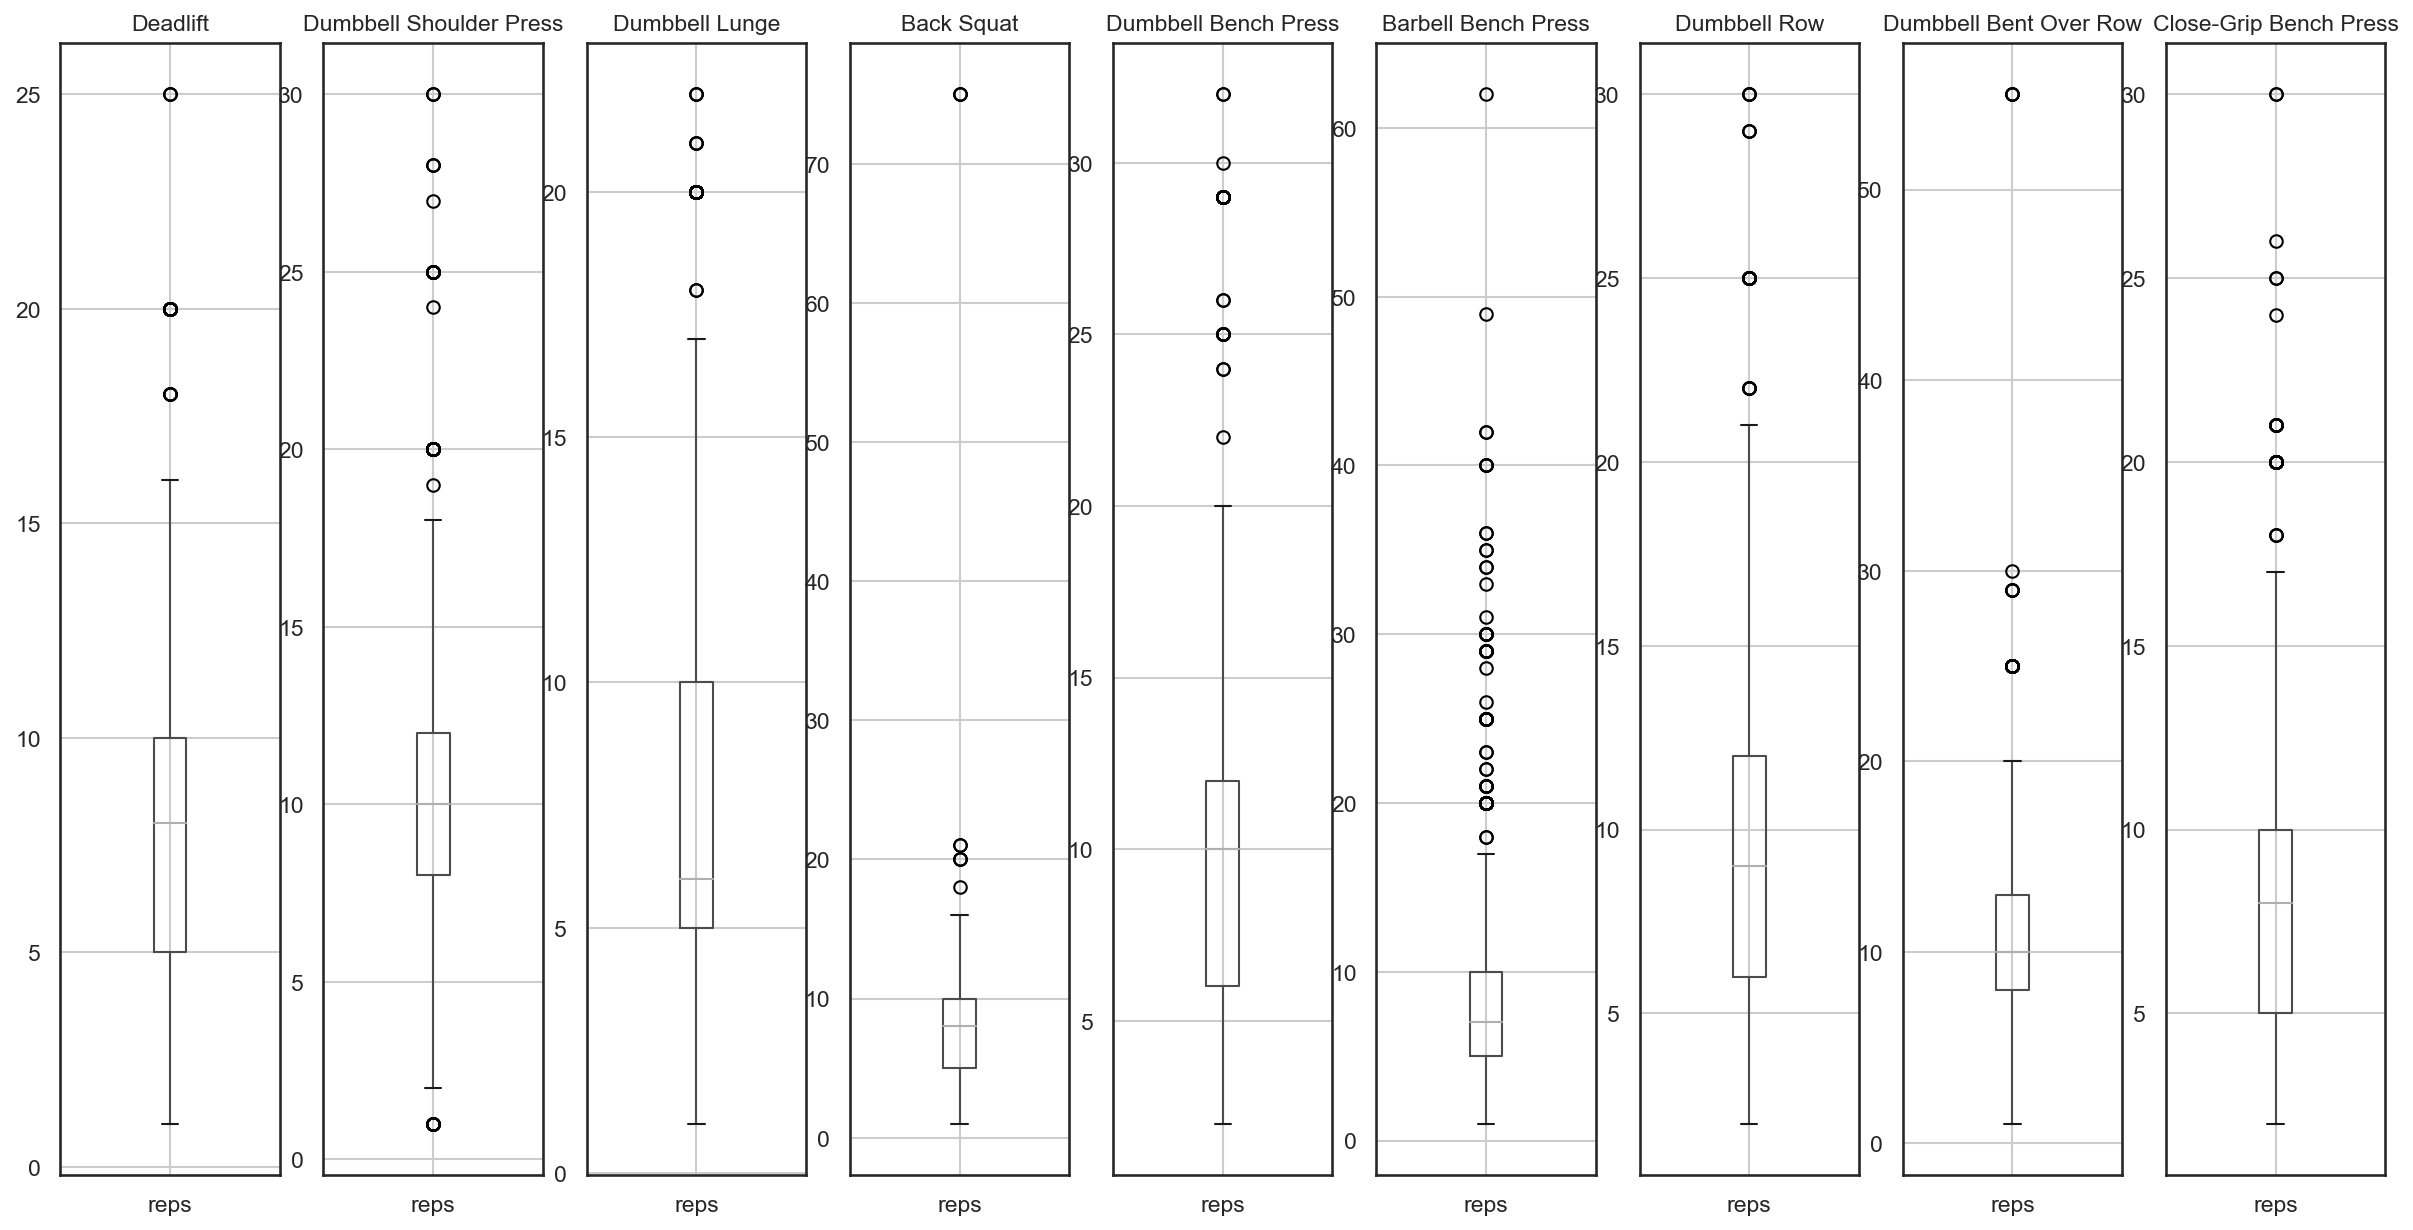

In [704]:
fig=plt.figure()
for i,e in enumerate(set(df.exerciseName)):
    ax=fig.add_subplot(1,len(set(df.exerciseName)),1+i)
    df[df.exerciseName==e].boxplot(column='reps',ax=ax)
    plt.title(e,fontsize = 11)

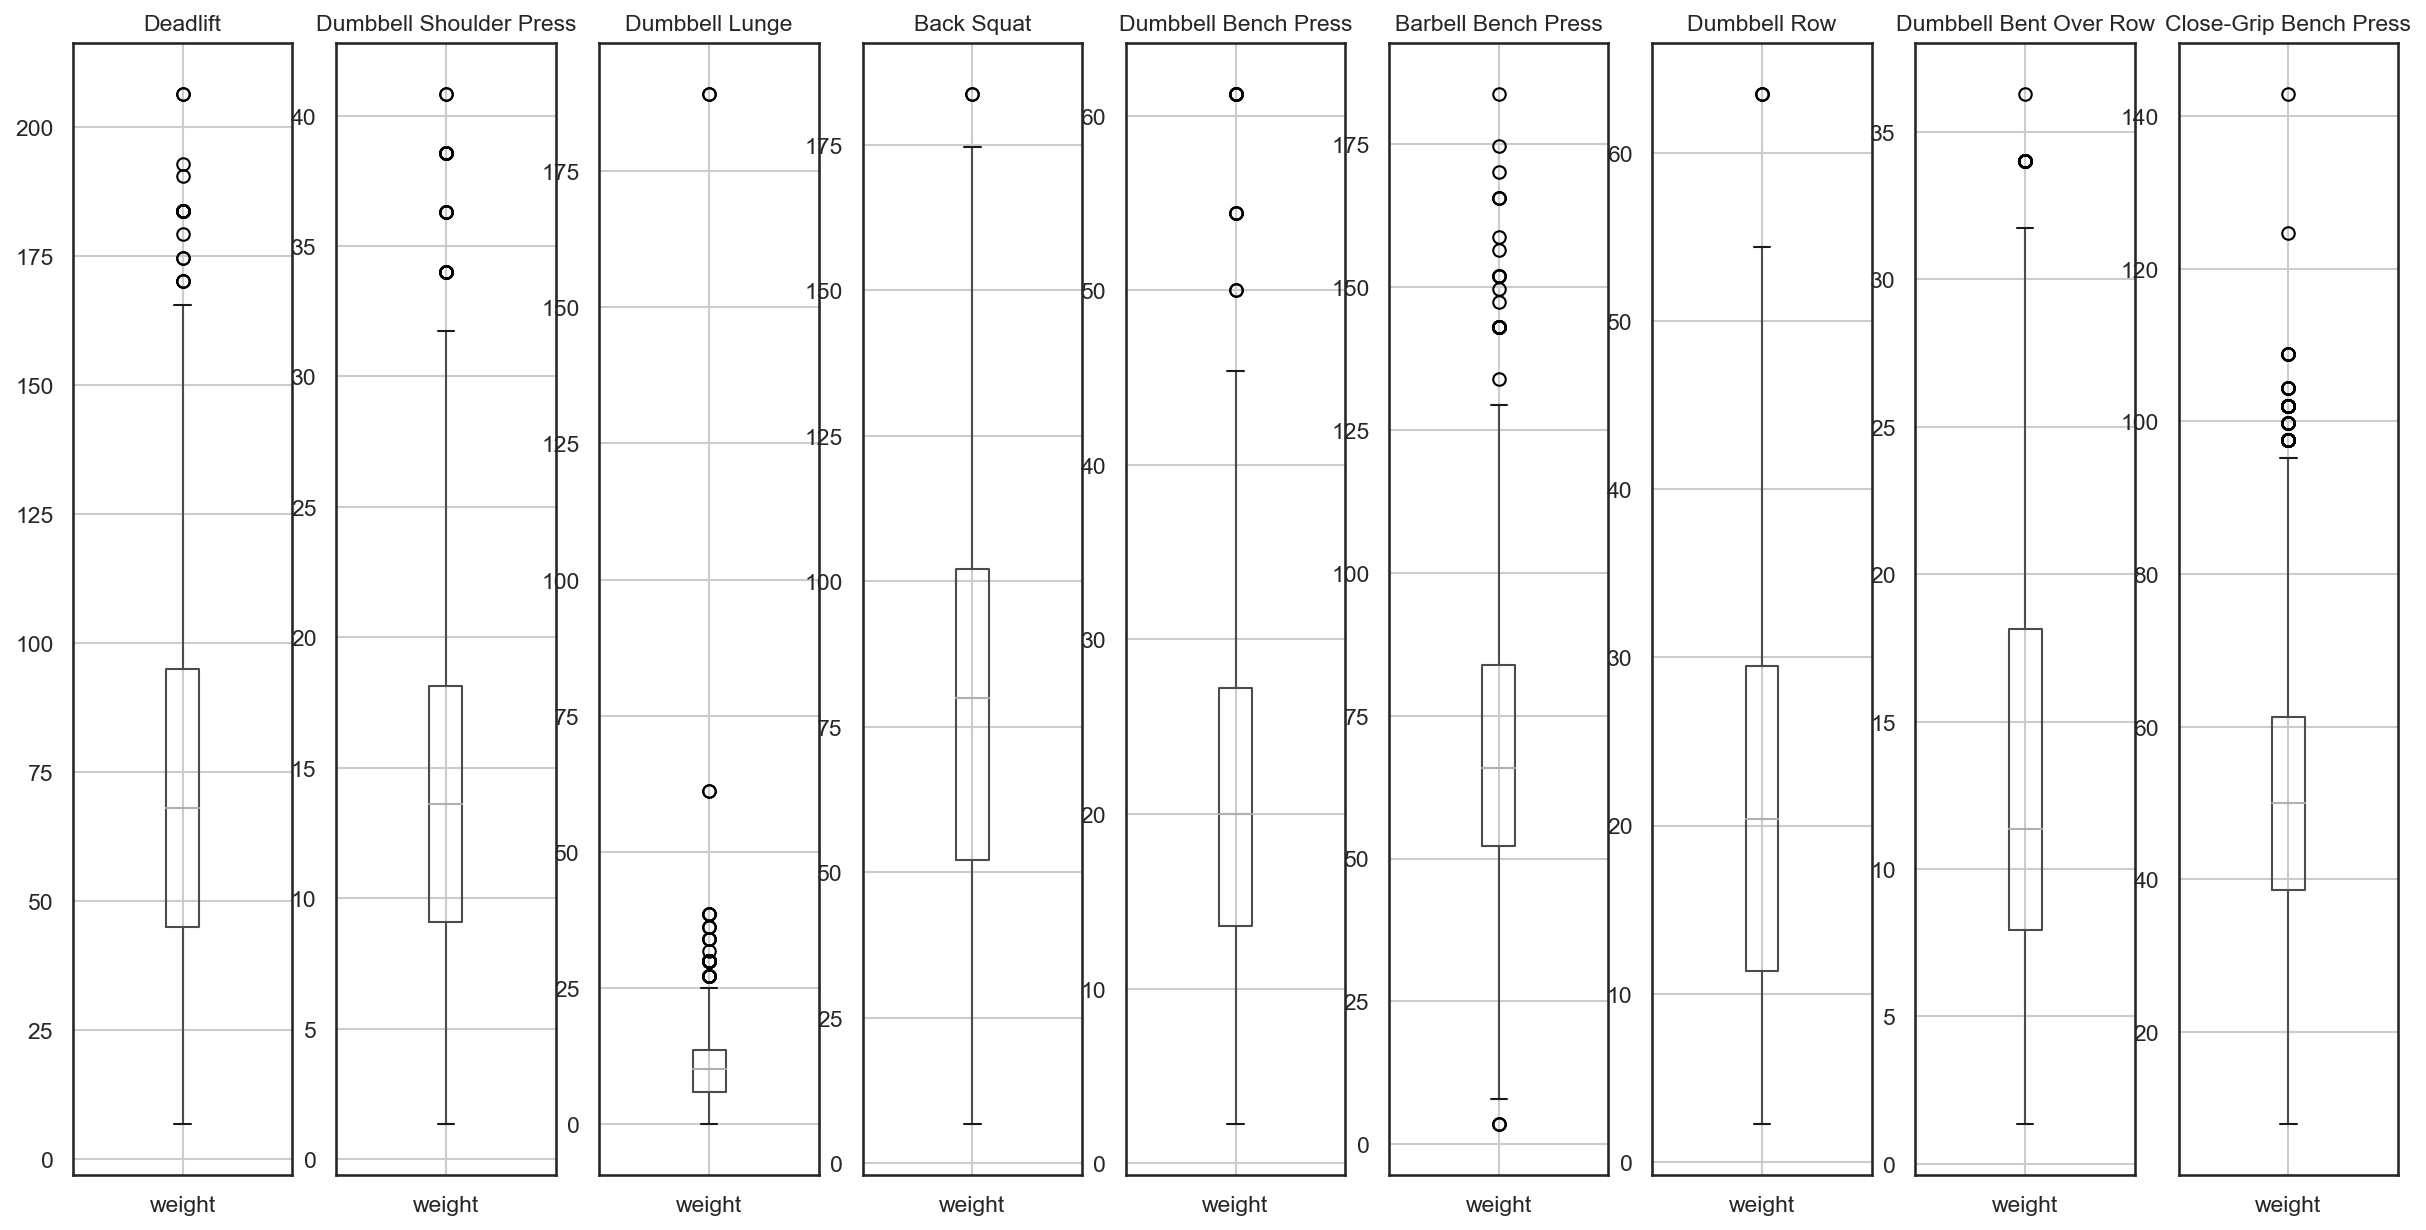

In [706]:
fig=plt.figure()
for i,e in enumerate(set(df.exerciseName)):
    ax=fig.add_subplot(1,len(set(df.exerciseName)),1+i)
    df[df.exerciseName==e].boxplot(column='weight',ax=ax)
    plt.title(e,fontsize = 11)

##### deadlift, back squat and barbell bench press are obvious in the heavy league. Most of the dumbbell involved exercises are around 20lbs, except for dumbbell bent over row is around 12lbs.

##### User workout sessions distribution

(0.0, 160.0)

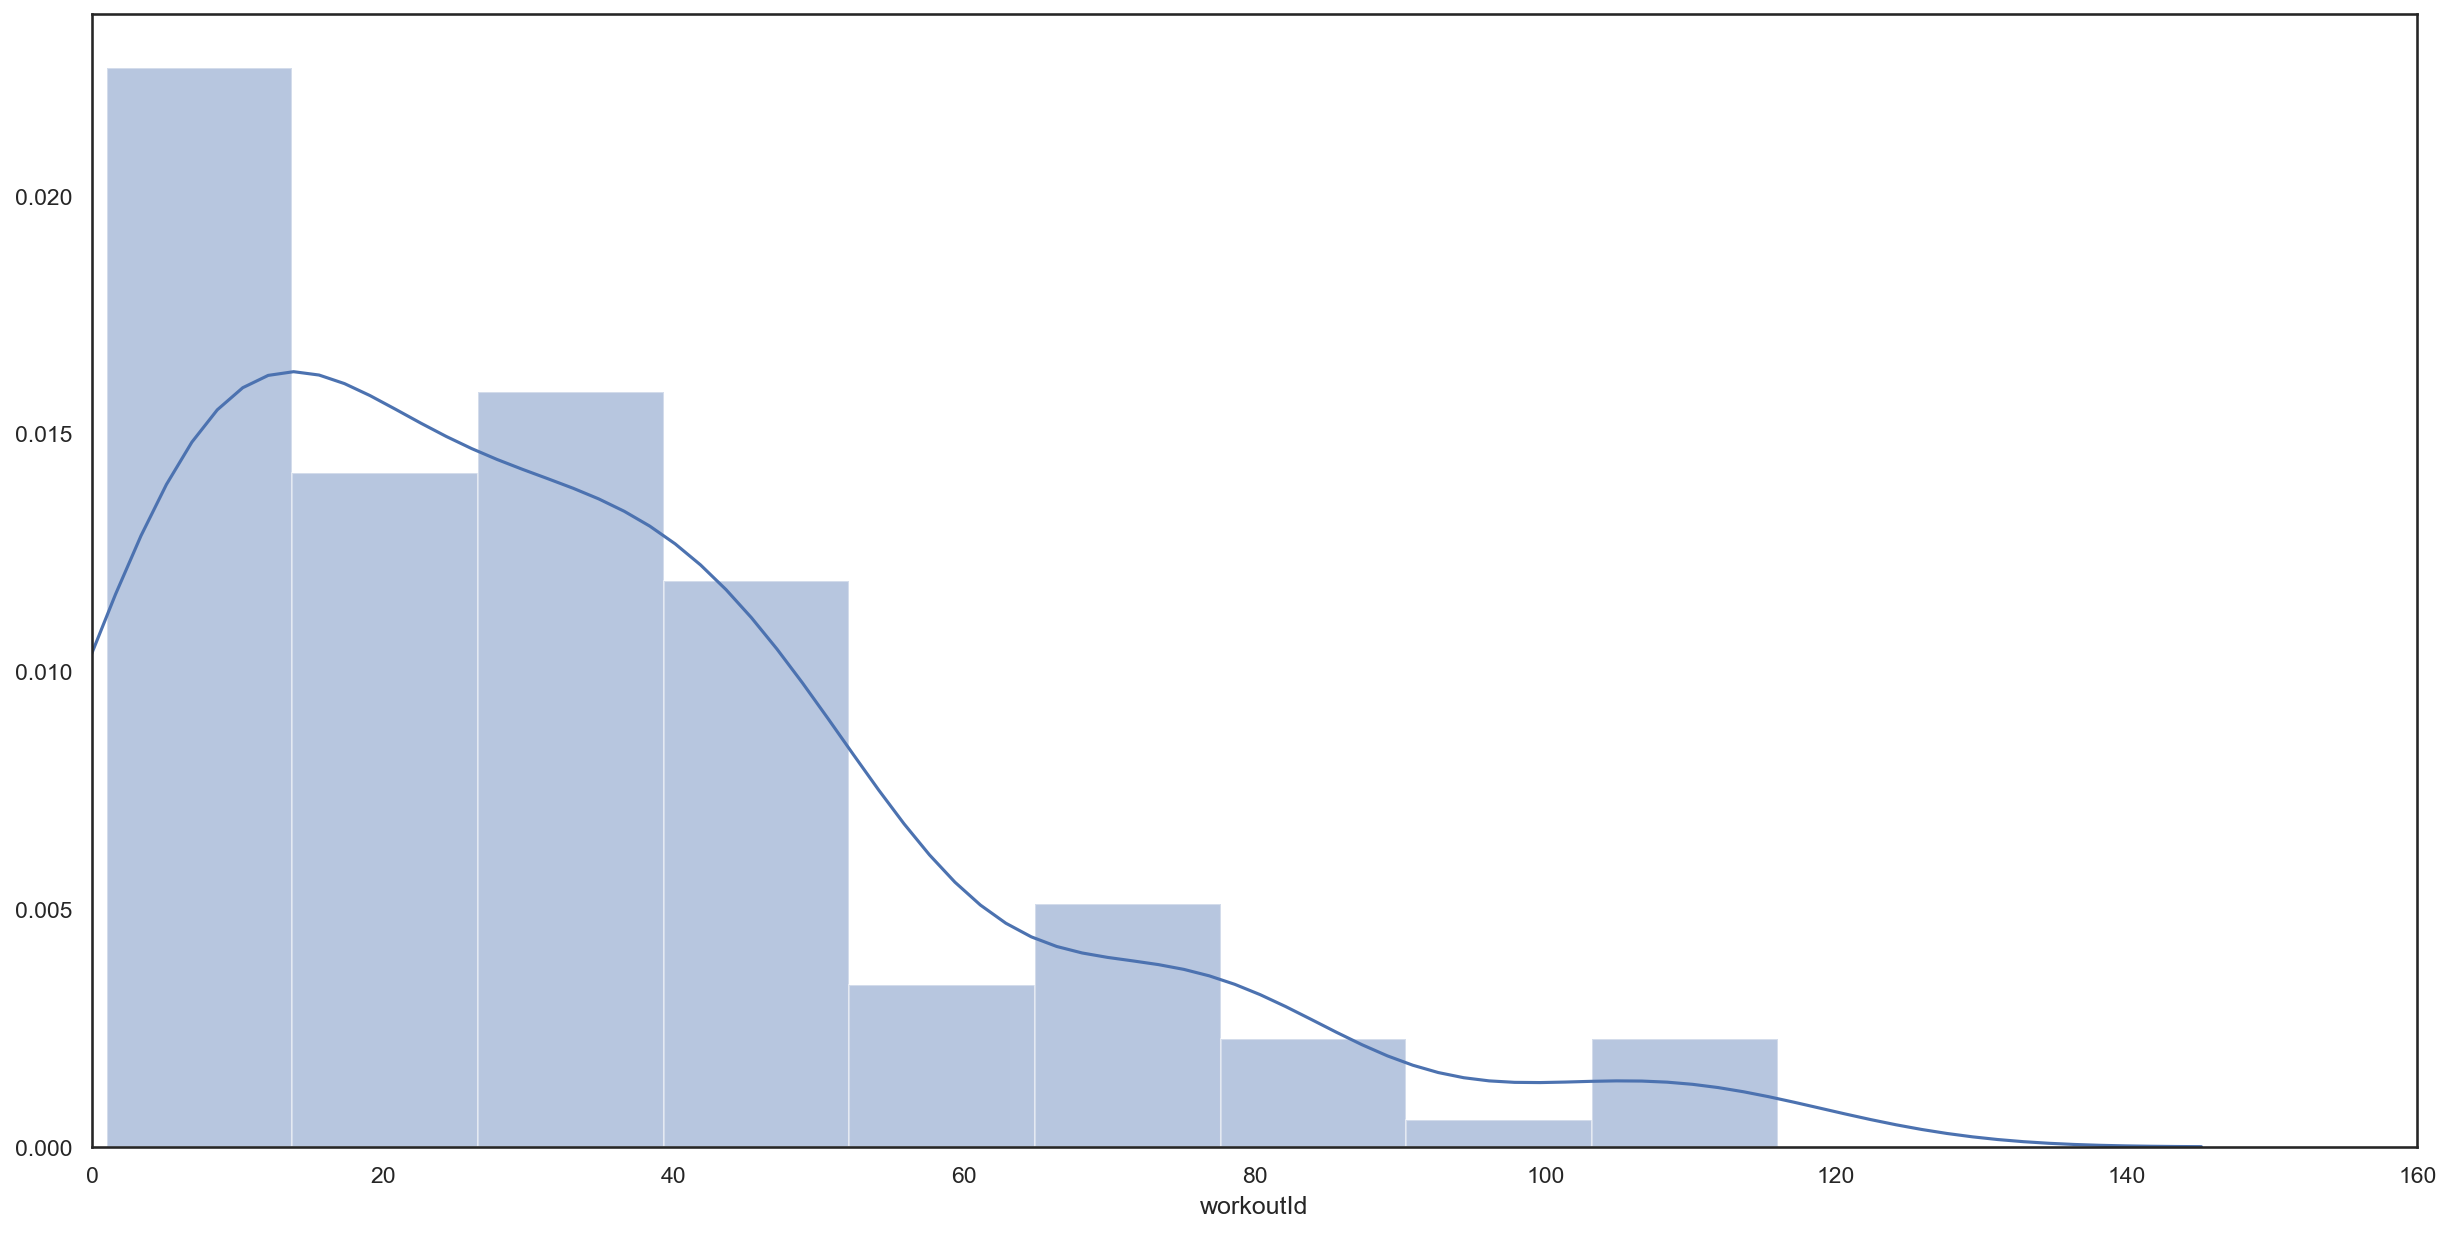

In [711]:
sns.distplot(df.groupby('fake_user_id').workoutId.nunique())
plt.xlim(0, 160)

###### the majority of the consumers use our app 1-50 times a year

##### Since our business model is subscription, we want to have growing active users and keep them engaged. Therefore, we might want to understand the motivation behind those frequent uses that kept them engaged.

##### User drill down

In [1313]:
df_bins=pd.cut(df.groupby('fake_user_id').workoutId.nunique(),3,labels=['light_user','mid_user','frequent_user']).reset_index(name='user_group')

In [1314]:
df_user_group=df.merge(df_bins,left_on='fake_user_id',right_on='fake_user_id')
df_user_group

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id,DayName,Month,Quarter,Year,user_group
0,2020-01-11,ZnRiJZczlV,mnwUcsbS9T,EviwaE3MDQ,Barbell Bench Press,8,65.770972,fake_id_876,Saturday,2020-01,2020Q1,2020,mid_user
1,2020-03-13,HYRu9kWXhU,52vo7F7CLd,jC4JkfRyzn,Close-Grip Bench Press,12,45.359291,fake_id_876,Friday,2020-03,2020Q1,2020,mid_user
2,2020-01-15,7RPADImnei,6REm9Tfqpa,xSE3vXzfYQ,Dumbbell Row,3,15.875752,fake_id_876,Wednesday,2020-01,2020Q1,2020,mid_user
3,2020-03-09,Q9t8mhZ7qO,mnwUcsbS9T,qMJSCH0Eh9,Barbell Bench Press,4,63.503007,fake_id_876,Monday,2020-03,2020Q1,2020,mid_user
4,2020-05-18,emMhP2YHkr,mnwUcsbS9T,bPFzCx17iq,Barbell Bench Press,5,65.770972,fake_id_876,Monday,2020-05,2020Q2,2020,mid_user
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,2019-12-03,gI2D48KR9c,mvkMgAdecH,taaSSuDbFc,Dumbbell Shoulder Press,12,2.267965,fake_id_981,Tuesday,2019-12,2019Q4,2019,light_user
21349,2019-12-03,gI2D48KR9c,mvkMgAdecH,TB7HzH8Ham,Dumbbell Shoulder Press,12,2.267965,fake_id_981,Tuesday,2019-12,2019Q4,2019,light_user
21350,2019-08-30,SLFYH1vPAT,ZAIuKpHvue,Ab6M3P4C83,Dumbbell Lunge,7,9.071858,fake_id_971,Friday,2019-08,2019Q3,2019,light_user
21351,2019-08-30,SLFYH1vPAT,ZAIuKpHvue,Do55re1Kpy,Dumbbell Lunge,7,9.071858,fake_id_971,Friday,2019-08,2019Q3,2019,light_user


In [1296]:
df_user_group.user_group=df_user_group.user_group.astype(object)

In [1337]:
group_weight=df_user_group.groupby(['user_group','Quarter','exerciseName'])['weight'].mean().reset_index()
group_weight

,user_group,Quarter,exerciseName,weight
0,light_user,2019Q3,Back Squat,73.322083
1,light_user,2019Q3,Barbell Bench Press,53.951017
2,light_user,2019Q3,Close-Grip Bench Press,48.940811
3,light_user,2019Q3,Deadlift,58.274094
4,light_user,2019Q3,Dumbbell Bench Press,20.304466
...,...,...,...,...
130,frequent_user,2020Q3,Dumbbell Bench Press,20.416069
131,frequent_user,2020Q3,Dumbbell Bent Over Row,22.679645
132,frequent_user,2020Q3,Dumbbell Lunge,9.071858
133,frequent_user,2020Q3,Dumbbell Row,26.417414


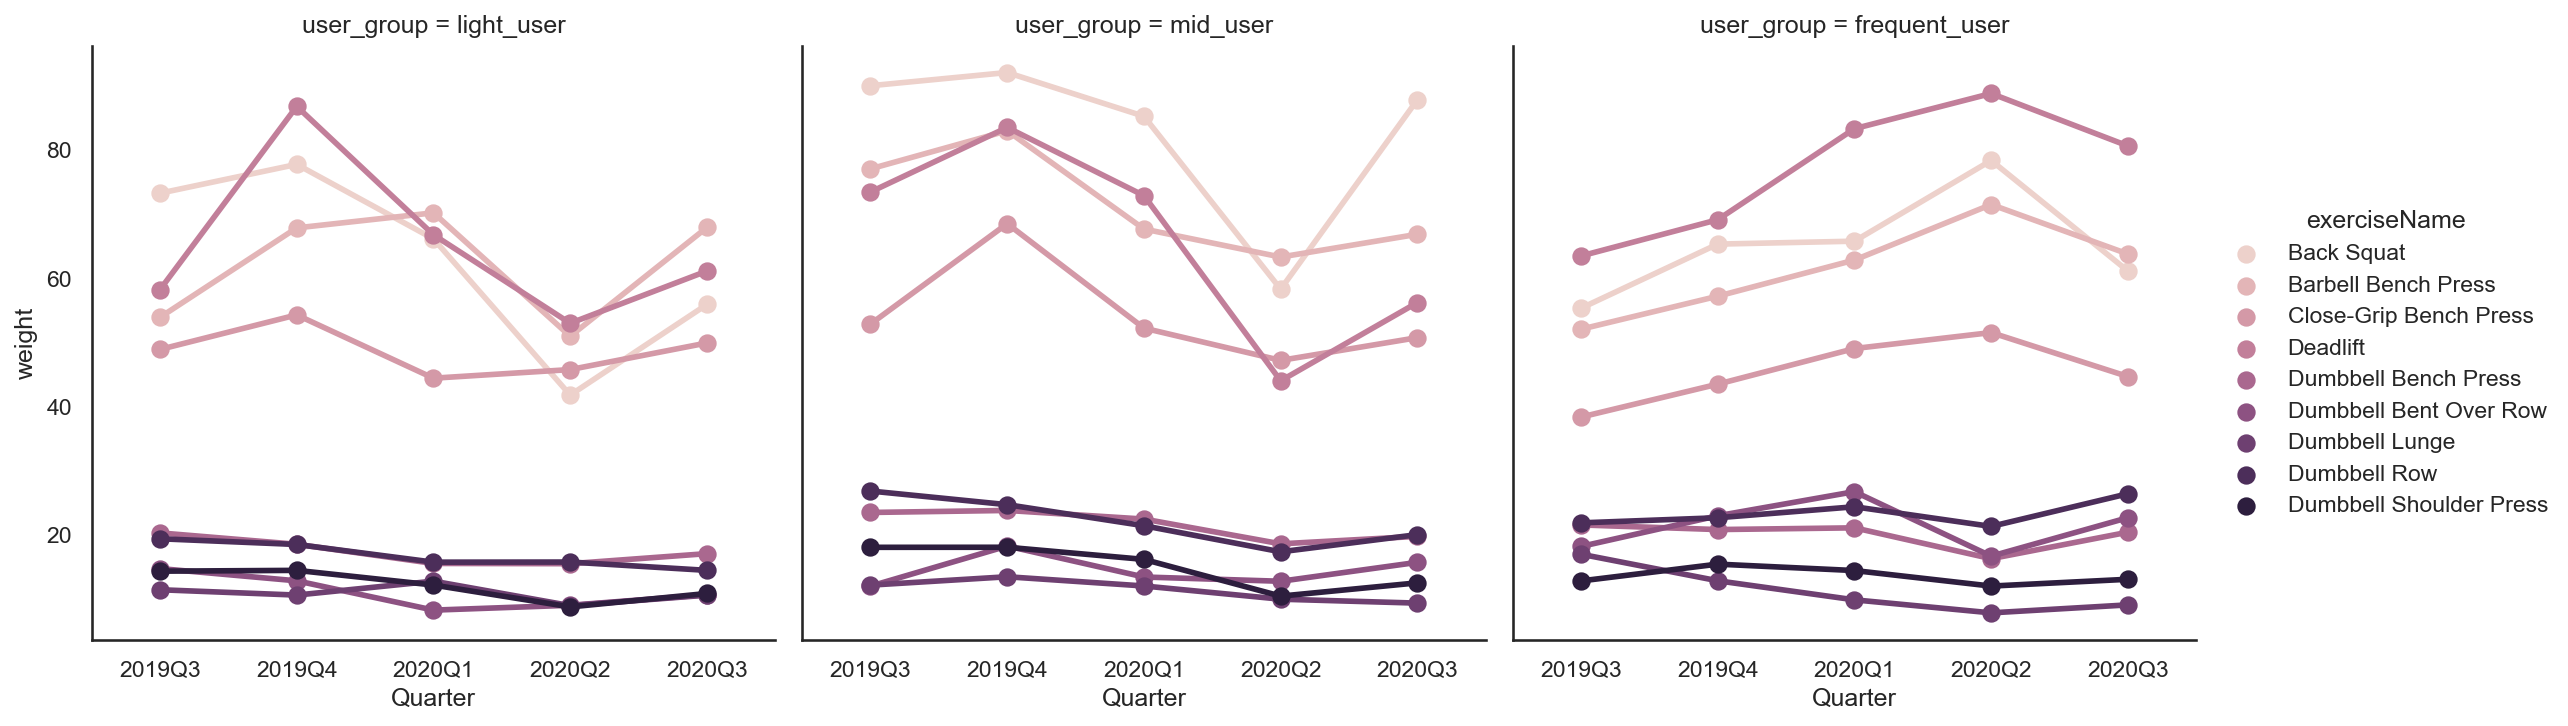

In [1338]:
sns.catplot(x="Quarter", y="weight", hue="exerciseName",col='user_group',kind='point', data=group_weight,palette=sns.cubehelix_palette(9))

##### the frequent users distinguish from mid and light users in terms of weights. frequent user kept an upward trend for top 4 exercises while the other groups dropped at the third quarter. we may consider sending notifications of increasing weights at that stage assuming this phenomenon was not impacted by covid19.

In [1339]:
group_singleset=df_user_group.groupby(['user_group','Quarter','exerciseName'])['singleSetId'].count().reset_index()
group_singleset

,user_group,Quarter,exerciseName,singleSetId
0,light_user,2019Q3,Back Squat,99
1,light_user,2019Q3,Barbell Bench Press,158
2,light_user,2019Q3,Close-Grip Bench Press,112
3,light_user,2019Q3,Deadlift,91
4,light_user,2019Q3,Dumbbell Bench Press,209
...,...,...,...,...
130,frequent_user,2020Q3,Dumbbell Bench Press,12
131,frequent_user,2020Q3,Dumbbell Bent Over Row,24
132,frequent_user,2020Q3,Dumbbell Lunge,11
133,frequent_user,2020Q3,Dumbbell Row,41


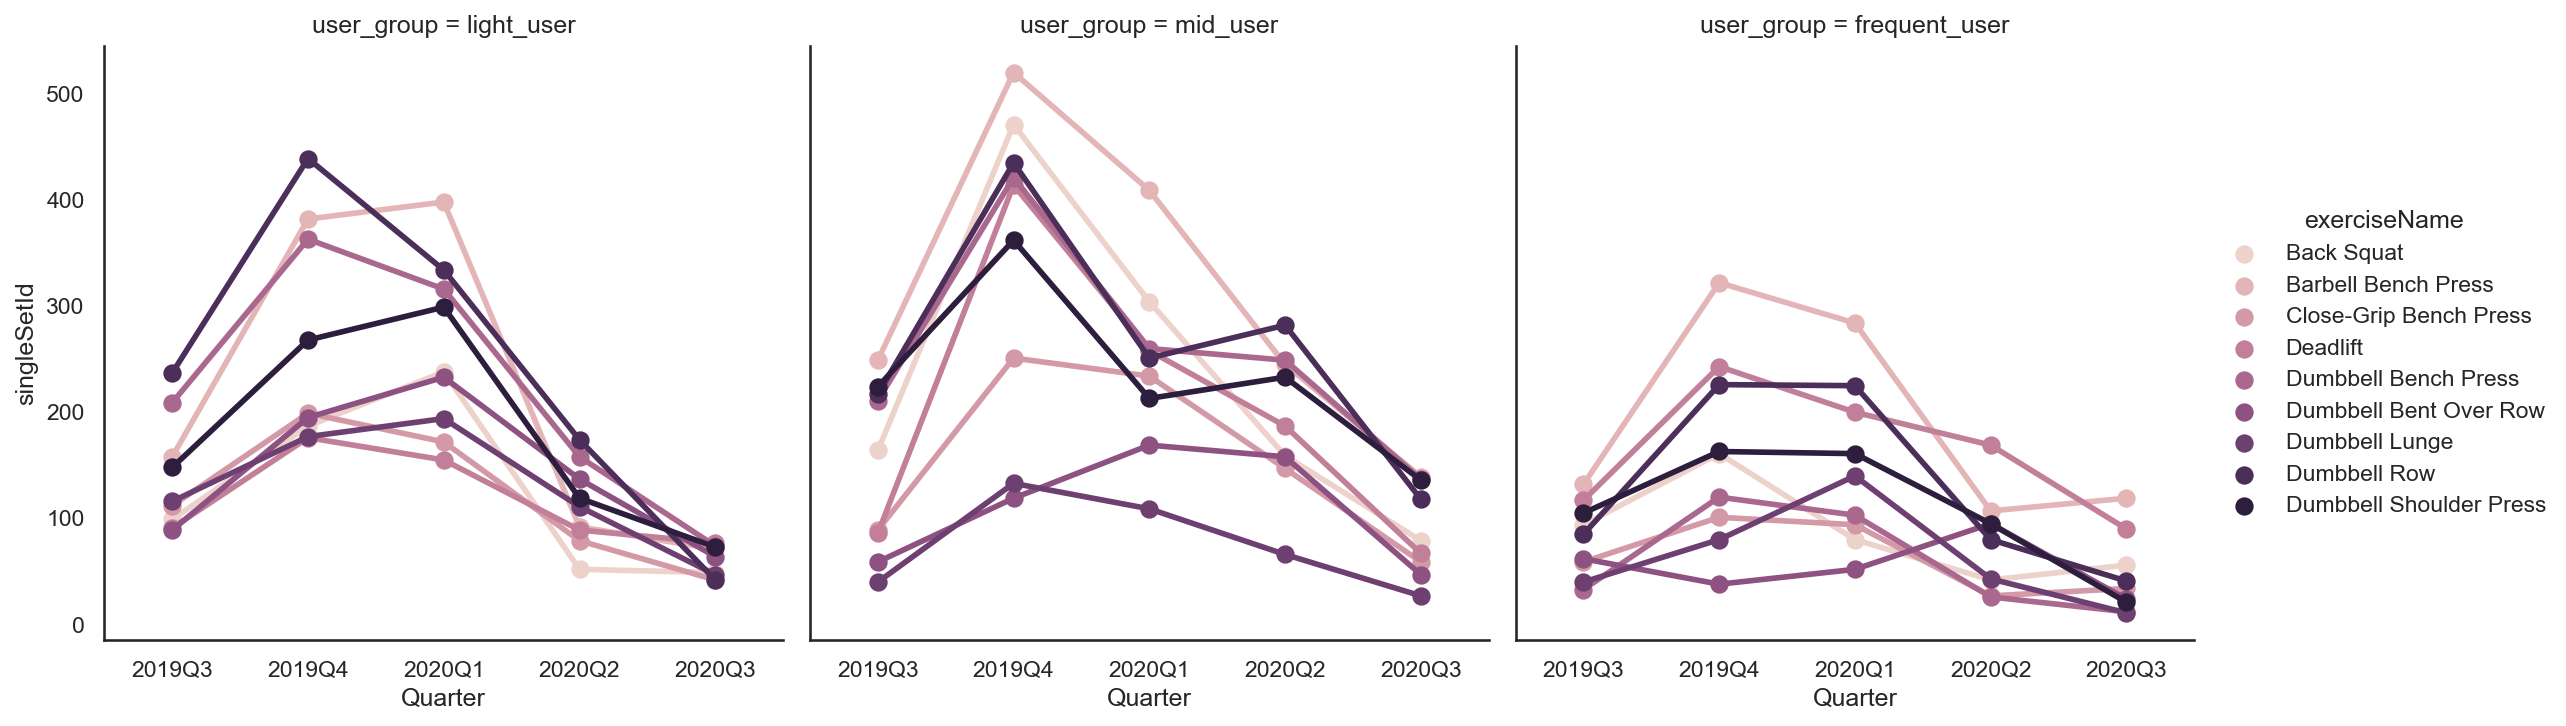

In [1340]:
sns.catplot(x="Quarter",y="singleSetId", hue="exerciseName",col='user_group',kind='point', data=group_singleset,palette=sns.cubehelix_palette(9))

##### as seen on the graphs, frequent users do less sets on average than the other two groups. Hence, we might suggest to new users that they do less sets so as to go further, and hence increase overall user activity. 

In [1341]:
group_reps=df_user_group.groupby(['user_group','Quarter','exerciseName'])['reps'].mean().reset_index()
group_reps

,user_group,Quarter,exerciseName,reps
0,light_user,2019Q3,Back Squat,8.141414
1,light_user,2019Q3,Barbell Bench Press,8.791139
2,light_user,2019Q3,Close-Grip Bench Press,9.133929
3,light_user,2019Q3,Deadlift,8.670330
4,light_user,2019Q3,Dumbbell Bench Press,9.110048
...,...,...,...,...
130,frequent_user,2020Q3,Dumbbell Bench Press,8.000000
131,frequent_user,2020Q3,Dumbbell Bent Over Row,15.000000
132,frequent_user,2020Q3,Dumbbell Lunge,5.909091
133,frequent_user,2020Q3,Dumbbell Row,13.195122


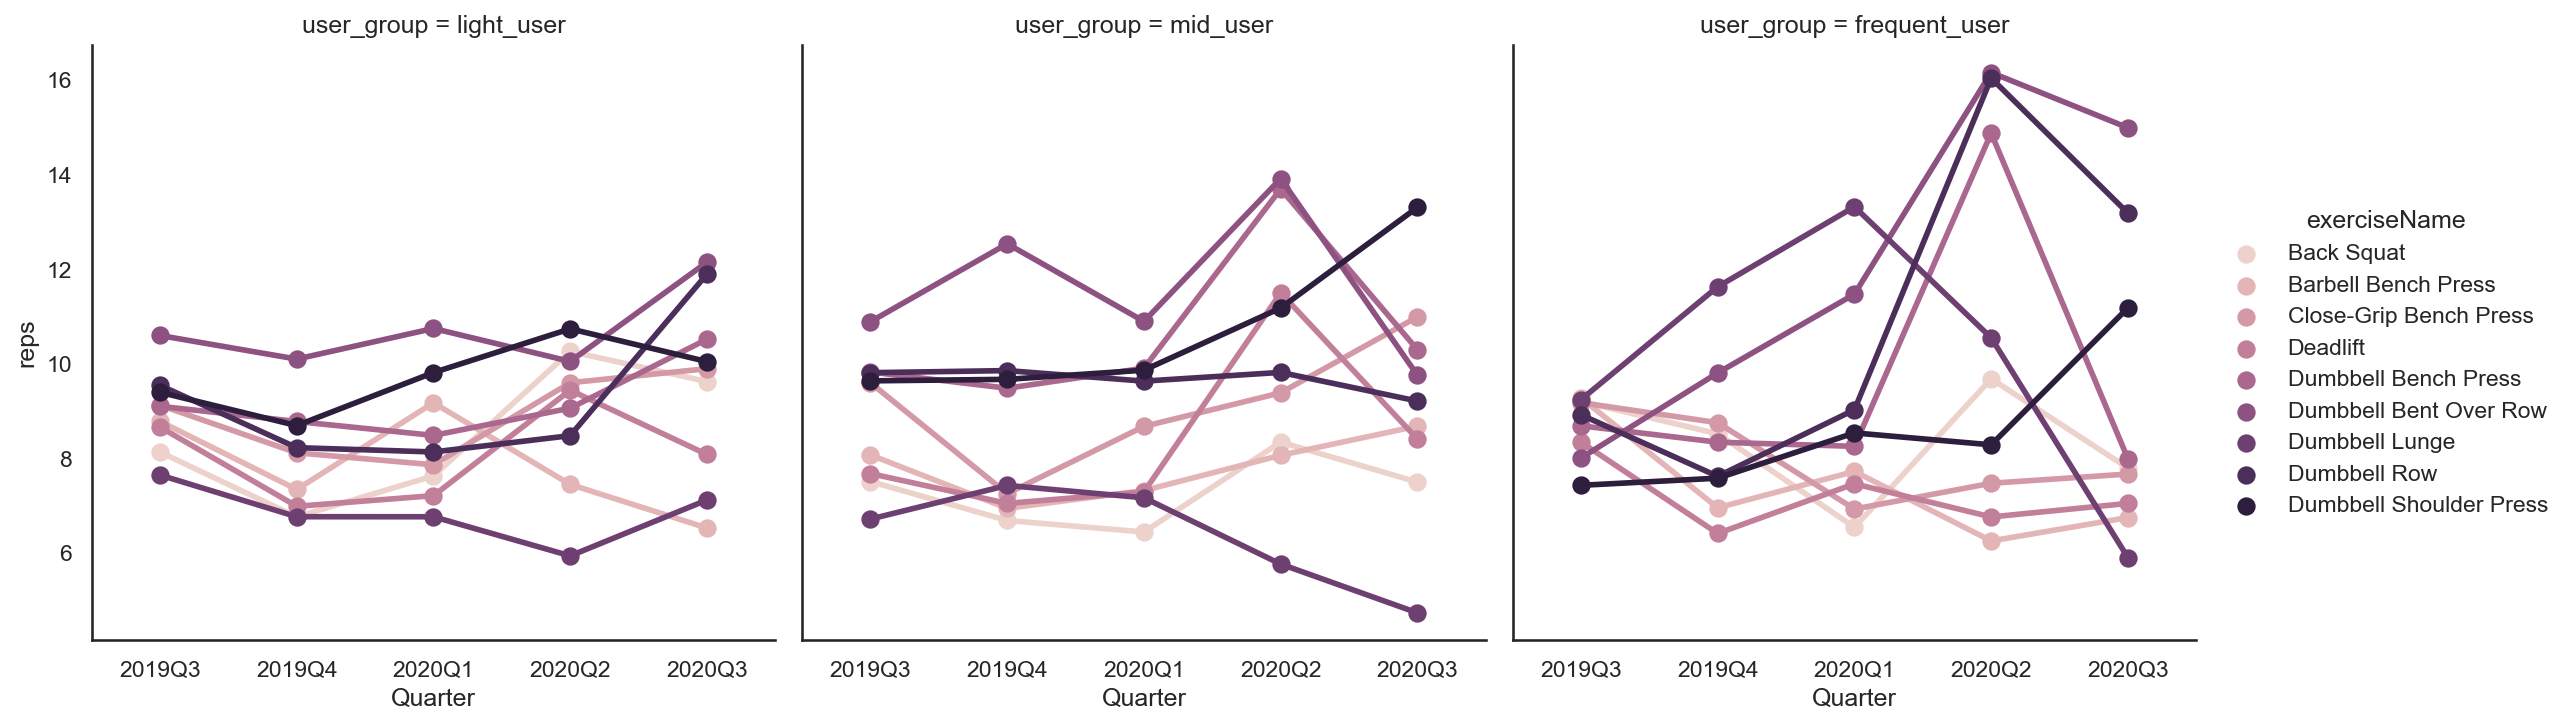

In [1342]:
sns.catplot(x="Quarter",y="reps", hue="exerciseName",col='user_group',kind='point', data=group_reps,palette=sns.cubehelix_palette(9))

In [1391]:
frequentuser=df.groupby('fake_user_id').workoutId.nunique().nlargest(5).index
df_frequentuser=df[df['fake_user_id'].isin(frequentuser)]
df_frequentuser=df_frequentuser.groupby(['exerciseName','Quarter','fake_user_id']).singleSetId.count().reset_index()
#df_frequentuser.sort_values(by='Month',ascending=True)

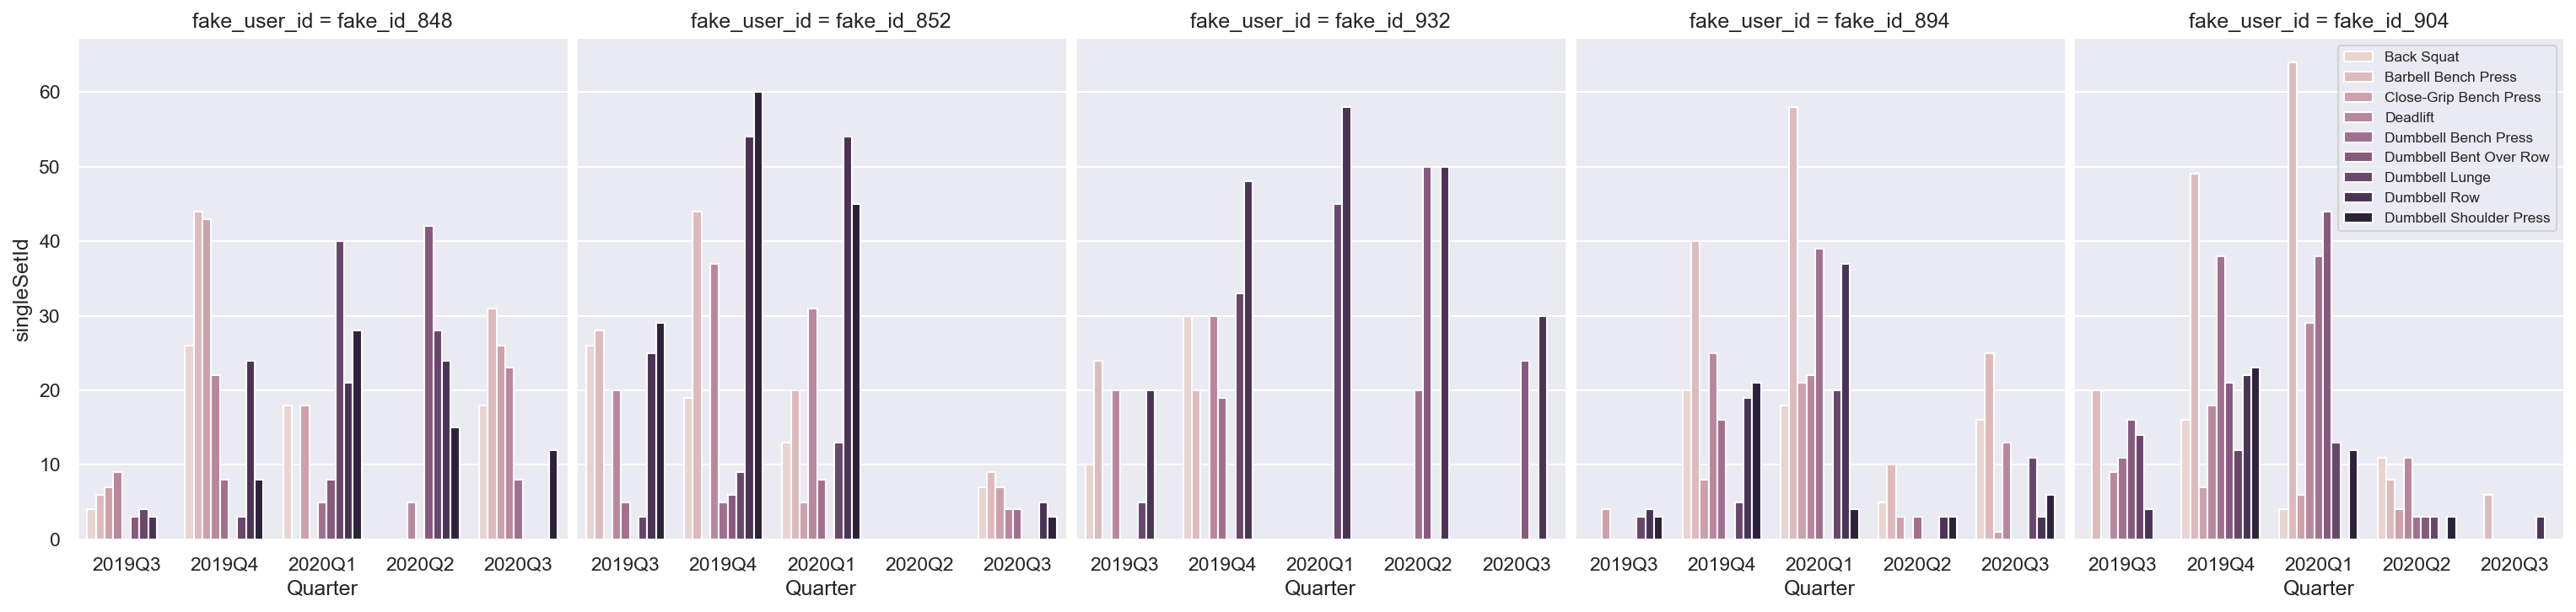

In [1392]:
g=sns.catplot(x="Quarter",y="singleSetId", hue="exerciseName",col='fake_user_id',kind='bar',
            height=5, aspect=2,legend=False,
            data=df_frequentuser,palette=sns.cubehelix_palette(9))
g.fig.set_size_inches(20,5)
plt.legend(loc='upper right',fontsize='x-small')

##### it is interesting that the 9 exercised in the database involved 2 pieces of equipment, the first 4 exercises (in the legend) require barbells and the last 5 need dumbbell. In Q1 and Q2 2020, these frequent users had a spike on dumbell related exercised. it might impacted by covid19, since most of the gyms closed at that time and dumbbell is more accessible at home. But assuming this is not covid19 related, we might want to understand why these users made the switch; was it because the user had a pre-determined timeline and the switch was planned ahead of time, or was it because the user was actively advised by a third party to do so, or was it even because he/she was influenced by contents on the media? Depending on the reason, there could be an array of prospective functionalities to be developed, e.g. a "bespoke fitness plan". Or if the user was advised by our app to do so and continues to show high activity level after the switch, we could perhaps look into improving and/or marketing this functionality so as to use such success anecdotes to encourage activities in other users or attract more new users to our app. 

##### Cohort analysis

In [623]:
df.set_index('fake_user_id',inplace=True)
df['CohortGroup']=df.groupby(level=0)['month'].min()
df.reset_index(inplace=True)

In [640]:
cohorts=df.groupby(['CohortGroup','month'])['fake_user_id'].nunique().reset_index(name='usercount')

In [641]:
cohorts

,CohortGroup,month,usercount
0,2019-08,2019-08,74
1,2019-08,2019-09,63
2,2019-08,2019-10,64
3,2019-08,2019-11,61
4,2019-08,2019-12,54
...,...,...,...
79,2020-04,2020-08,1
80,2020-05,2020-05,1
81,2020-05,2020-06,1
82,2020-05,2020-07,1


In [642]:
def cohort_period(df):
    df['CohortPeriod']=np.arange(len(df))+1
    return df

In [643]:
cohorts

,CohortGroup,month,usercount
0,2019-08,2019-08,74
1,2019-08,2019-09,63
2,2019-08,2019-10,64
3,2019-08,2019-11,61
4,2019-08,2019-12,54
...,...,...,...
79,2020-04,2020-08,1
80,2020-05,2020-05,1
81,2020-05,2020-06,1
82,2020-05,2020-07,1


In [644]:
cohorts=cohorts.groupby('CohortGroup').apply(cohort_period)

In [645]:
cohorts_table=cohorts.pivot_table(index='CohortGroup',columns='CohortPeriod',values='usercount')
cohorts_table

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortGroup,,,,,,,,,,,,,
2019-08,74.0,63.0,64.0,61.0,54.0,47.0,37.0,27.0,14.0,20.0,23.0,25.0,22.0
2019-09,17.0,16.0,13.0,11.0,13.0,10.0,8.0,6.0,3.0,8.0,5.0,5.0,NaN
2019-10,10.0,7.0,7.0,6.0,5.0,4.0,1.0,3.0,2.0,2.0,NaN,NaN,NaN
2019-11,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
2019-12,10.0,8.0,6.0,6.0,4.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN
2020-01,10.0,10.0,8.0,7.0,5.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2020-02,8.0,8.0,5.0,5.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
user_retention=cohorts_table.divide(cohorts_table.iloc[:,0], axis=0)

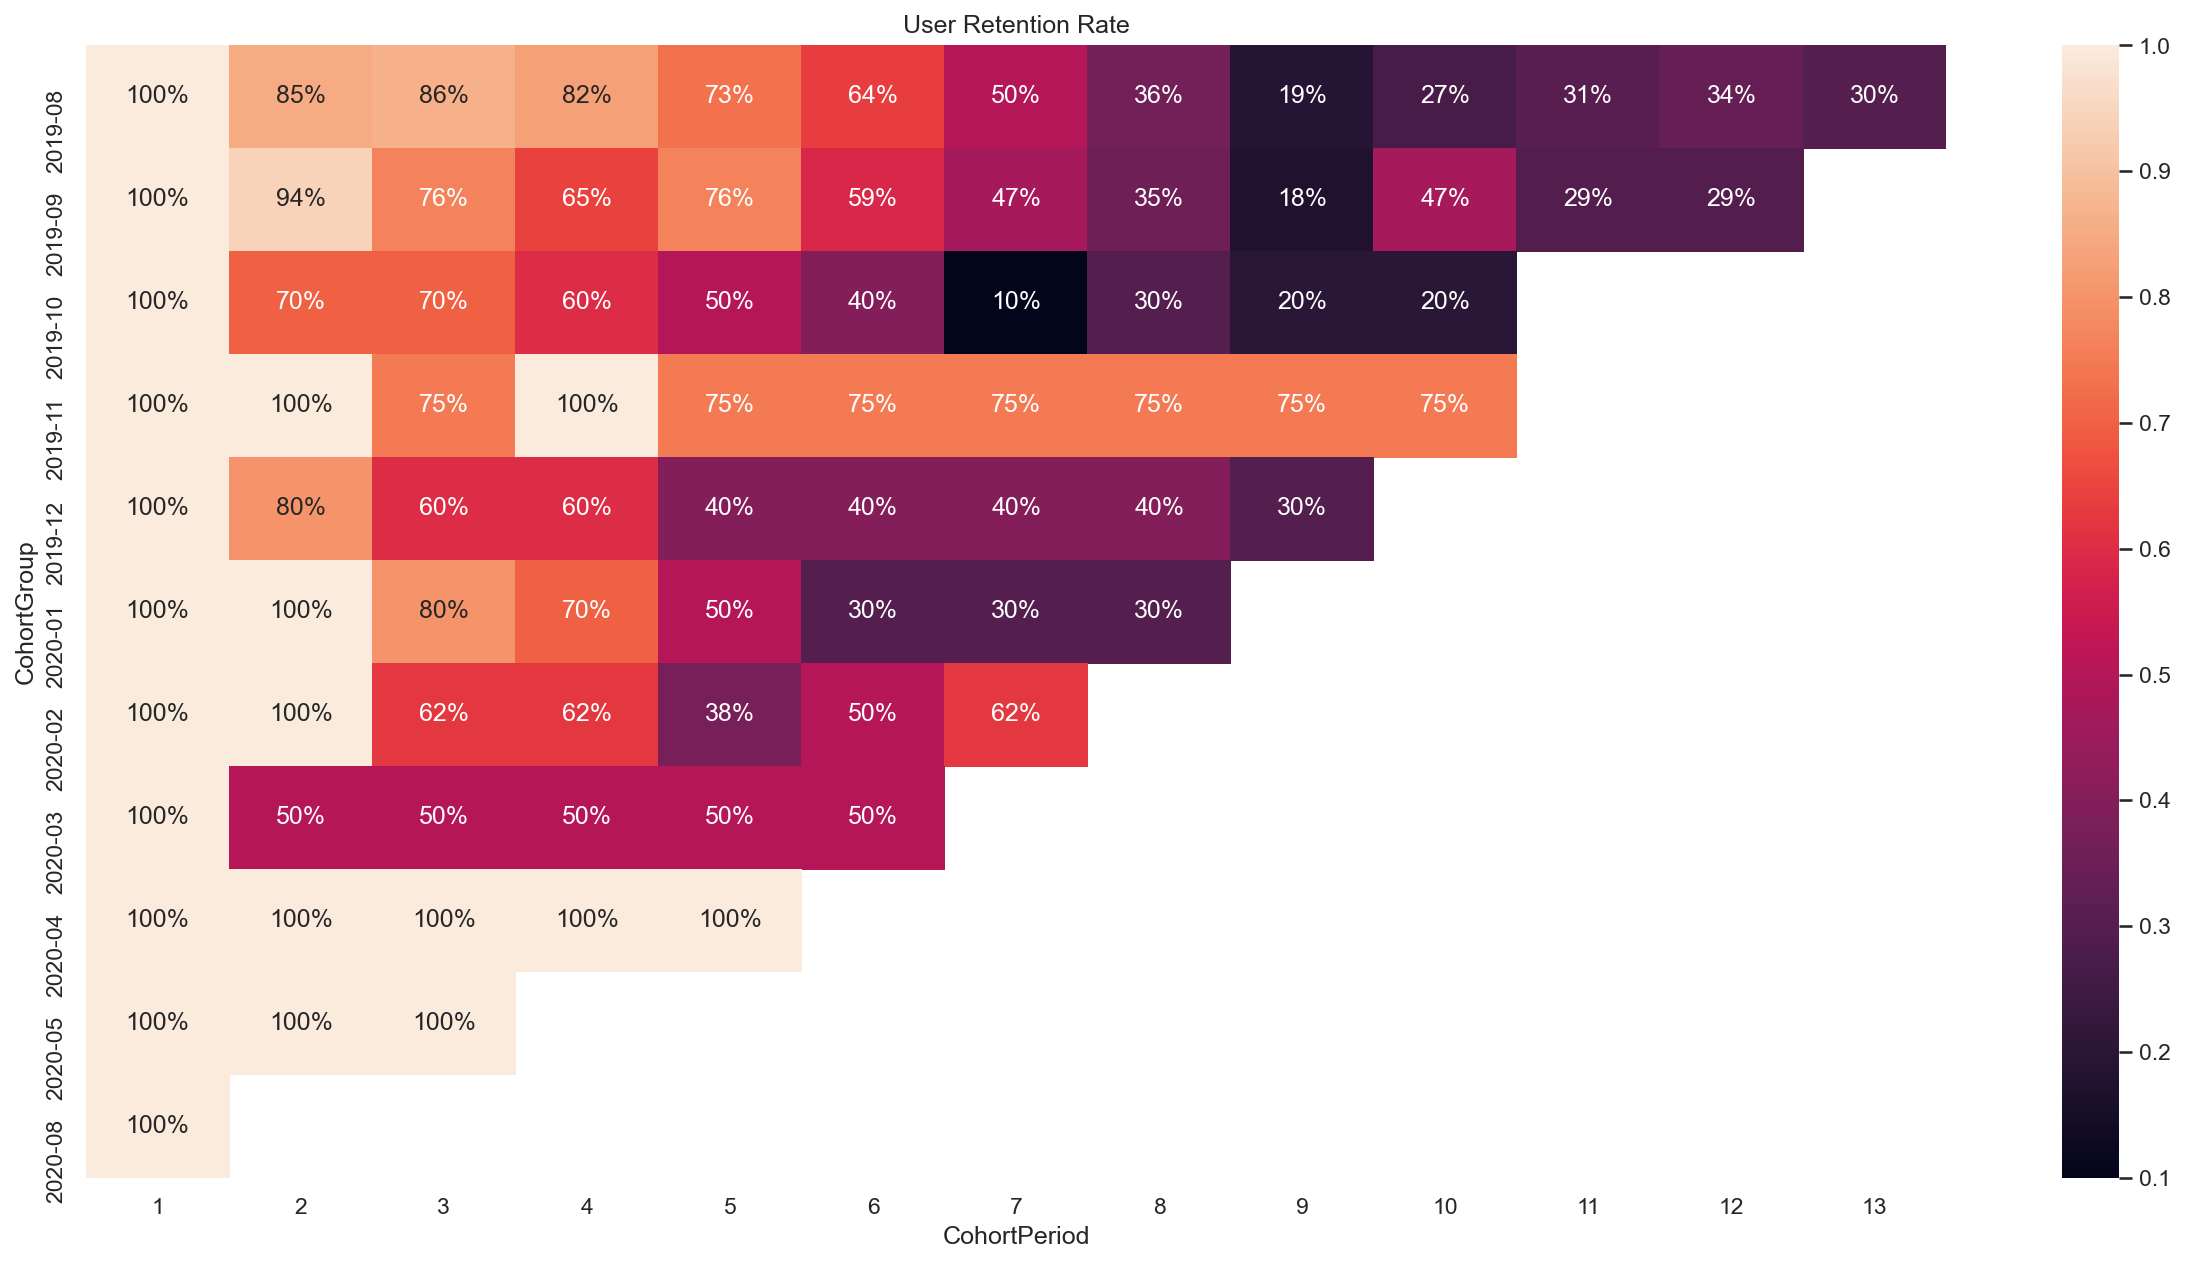

In [782]:
plt.title('User Retention Rate')
sns.heatmap(user_retention, mask=user_retention.isnull(), annot=True, fmt='.0%');

##### the user rentention rate is pretty high in general. However, there is a sharp decrease in Apr for cohort 2019-08 and cohort 2019-09, these 2 groups of loyal customers, and the trend bouncs back at the following months(truely loyal). We may want to understand what factors keep them engaged, what did we do right and more importantly, could we market this postivie dynamics to attract more users?

##### recommendation engine

##### Given the structure and content of the data, I choose to build a recommendation engine. Since we dont have a lot of attributes of items (exercises) in our datasets, i will not use content based method. I am using item to item collaborative filtering.

##### steps
##### 1. Assign a weight to all users with respect to similarity with the target user.
##### 2. Select k users that have the highest similarity with the target user
##### 3. Compute a prediction from a weighted combination of the selected neighbors’ ratings.

##### Since we dont have a rating matrix at hand, i will build a rating based on the percentage of exercises one user did in a year.
##### i did not choose reps or weights, becuase these 2 variables may vary from exercises to exercises.  we may weight them in the future work.

In [1185]:
df_interact=df.groupby(['fake_user_id','exerciseName'])['singleSetId'].count().reset_index(name='counts')
df_subtotal=df.groupby(['fake_user_id'])['singleSetId'].count()
df_interact=df_interact.merge(df_subtotal,left_on='fake_user_id',right_on='fake_user_id')
df_interact['ratings']=df_interact.counts/df_interact.singleSetId
df_interact

,fake_user_id,exerciseName,counts,singleSetId,ratings
0,fake_id_844,Back Squat,56,335,0.167164
1,fake_id_844,Barbell Bench Press,82,335,0.244776
2,fake_id_844,Close-Grip Bench Press,46,335,0.137313
3,fake_id_844,Deadlift,57,335,0.170149
4,fake_id_844,Dumbbell Bench Press,14,335,0.041791
...,...,...,...,...,...
923,fake_id_978,Dumbbell Bench Press,5,17,0.294118
924,fake_id_979,Dumbbell Bench Press,3,22,0.136364
925,fake_id_979,Dumbbell Shoulder Press,19,22,0.863636
926,fake_id_980,Barbell Bench Press,50,50,1.000000


In [1202]:
df_train,df_test = train_test_split(df_interact, test_size=0.2,random_state=3)

In [1203]:
userproduct_train=df_train.pivot_table(values=['ratings'],index='fake_user_id',columns='exerciseName')
userproduct_test=df_test.pivot_table(values=['ratings'],index='fake_user_id',columns='exerciseName')
userproduct_train

ratings                                                       \
exerciseName Back Squat Barbell Bench Press Close-Grip Bench Press  Deadlift   
fake_user_id                                                                   
fake_id_844    0.167164            0.244776               0.137313       NaN   
fake_id_845    0.065625                 NaN               0.040625  0.112500   
fake_id_846    0.219697            0.353535               0.083333  0.035354   
fake_id_847         NaN                 NaN               0.023529       NaN   
fake_id_848    0.113014            0.138699               0.160959  0.101027   
...                 ...                 ...                    ...       ...   
fake_id_977         NaN                 NaN                    NaN       NaN   
fake_id_978         NaN                 NaN                    NaN       NaN   
fake_id_979         NaN                 NaN                    NaN       NaN   
fake_id_980         NaN            1.000000                    NaN       NaN   
fake_id_981         NaN                 NaN                    NaN       NaN   

                                                                         \
exerciseName Dumbbell Bench Press Dumbbell Bent Over Row Dumbbell Lunge   
fake_user_id                                                              
fake_id_844                   NaN                    NaN       0.011940   
fake_id_845              0.146875               0.131250       0.021875   
fake_id_846              0.037879               0.022727       0.020202   
fake_id_847              0.070588               0.073529       0.052941   
fake_id_848              0.035959                    NaN       0.128425   
...                           ...                    ...            ...   
fake_id_977              0.307692                    NaN            NaN   
fake_id_978              0.294118                    NaN            NaN   
fake_id_979              0.136364                    NaN            NaN   
fake_id_980                   NaN                    NaN            NaN   
fake_id_981                   NaN                    NaN            NaN   

                                                   
exerciseName Dumbbell Row Dumbbell Shoulder Press  
fake_user_id                                       
fake_id_844      0.173134                0.032836  
fake_id_845      0.296875                0.121875  
fake_id_846      0.111111                0.116162  
fake_id_847      0.105882                0.126471  
fake_id_848      0.123288                0.107877  
...                   ...                     ...  
fake_id_977           NaN                     NaN  
fake_id_978           NaN                     NaN  
fake_id_979           NaN                     NaN  
fake_id_980           NaN                     NaN  
fake_id_981           NaN                1.000000  

[138 rows x 9 columns]

##### recenter the ratings to zero 
the benfits of doing this is we can treat missing ratings as average(0s)

In [1204]:
productuser_train=userproduct_train.T
productuser_test=userproduct_test.T
productuser_train.head()

fake_user_id                    fake_id_844  fake_id_845  fake_id_846  \
        exerciseName                                                    
ratings Back Squat                 0.167164     0.065625     0.219697   
        Barbell Bench Press        0.244776          NaN     0.353535   
        Close-Grip Bench Press     0.137313     0.040625     0.083333   
        Deadlift                        NaN     0.112500     0.035354   
        Dumbbell Bench Press            NaN     0.146875     0.037879   

fake_user_id                    fake_id_847  fake_id_848  fake_id_849  \
        exerciseName                                                    
ratings Back Squat                      NaN     0.113014          NaN   
        Barbell Bench Press             NaN     0.138699          NaN   
        Close-Grip Bench Press     0.023529     0.160959     0.018116   
        Deadlift                        NaN     0.101027          NaN   
        Dumbbell Bench Press       0.070588     0.035959     0.061594   

fake_user_id                    fake_id_850  fake_id_851  fake_id_852  \
        exerciseName                                                    
ratings Back Squat                      NaN     0.278388     0.108696   
        Barbell Bench Press        0.034286     0.128205     0.168896   
        Close-Grip Bench Press     0.034286     0.120879          NaN   
        Deadlift                   0.017143          NaN     0.153846   
        Dumbbell Bench Press       0.188571     0.065934     0.036789   

fake_user_id                    fake_id_853  ...  fake_id_972  fake_id_973  \
        exerciseName                         ...                             
ratings Back Squat                      NaN  ...          NaN          NaN   
        Barbell Bench Press             NaN  ...          NaN     0.136364   
        Close-Grip Bench Press     0.138889  ...          NaN          NaN   
        Deadlift                        NaN  ...     0.064103          NaN   
        Dumbbell Bench Press            NaN  ...     0.384615     0.181818   

fake_user_id                    fake_id_974  fake_id_975  fake_id_976  \
        exerciseName                                                    
ratings Back Squat                      NaN          NaN          NaN   
        Barbell Bench Press             NaN          NaN          NaN   
        Close-Grip Bench Press          NaN          NaN          NaN   
        Deadlift                        NaN     0.285714          1.0   
        Dumbbell Bench Press            NaN          NaN          NaN   

fake_user_id                    fake_id_977  fake_id_978  fake_id_979  \
        exerciseName                                                    
ratings Back Squat                      NaN          NaN          NaN   
        Barbell Bench Press             NaN          NaN          NaN   
        Close-Grip Bench Press          NaN          NaN          NaN   
        Deadlift                        NaN          NaN          NaN   
        Dumbbell Bench Press       0.307692     0.294118     0.136364   

fake_user_id                    fake_id_980  fake_id_981  
        exerciseName                                      
ratings Back Squat                      NaN          NaN  
        Barbell Bench Press             1.0          NaN  
        Close-Grip Bench Press          NaN          NaN  
        Deadlift                        NaN          NaN  
        Dumbbell Bench Press            NaN          NaN  

[5 rows x 138 columns]

In [1205]:
df_row_means=productuser_train.mean(axis=1)
productuser_normalized_train=productuser_train.sub(df_row_means, axis=0).fillna(0)

In [1206]:
df_row_means=productuser_test.mean(axis=1)
productuser_normalized_test=productuser_test.sub(df_row_means, axis=0).fillna(0)

##### Using cosine similarity to find similar users

In [1207]:
productuser_normalized_train.index = productuser_normalized_train.index.droplevel(0)
productuser_normalized_train.index

Index(['Back Squat', 'Barbell Bench Press', 'Close-Grip Bench Press',
       'Deadlift', 'Dumbbell Bench Press', 'Dumbbell Bent Over Row',
       'Dumbbell Lunge', 'Dumbbell Row', 'Dumbbell Shoulder Press'],
      dtype='object', name='exerciseName')

In [1208]:
productuser_normalized_test.index = productuser_normalized_test.index.droplevel(0)

In [1220]:
def get_kneighbours(productuser_matrix,kneighbours=5):
    sim_matrix=pd.DataFrame(cosine_similarity(productuser_matrix),columns=productuser_matrix.index,index=productuser_matrix.index)
    sorted_args=np.argsort(-sim_matrix,axis=1)
    return pd.DataFrame(np.apply_along_axis(lambda x:[sim_matrix.columns[y] for y in x],1,sorted_args),index=sorted_args.index).iloc[:,1:kneighbours+1]

##### caculate weighted ratings

In [1222]:
def get_ratings(exerciseName,productuser_matrix,test_matrix,kneighbours=5):
    neighborset=get_kneighbours(productuser_matrix,kneighbours=kneighbours).loc[exerciseName,:]
    ratings=(test_matrix.loc[neighborset].T.dot(sim_matrix[neighborset].iloc[0,]))/sim_matrix[neighborset].iloc[0,].sum()
    return ratings

##### evaluate the accuracy of our item-item memory based collaborative filtering using RMSE

In [1230]:
predictions_train=np.zeros((productuser_normalized_train.shape[0],productuser_normalized_train.shape[1]))

for i,(index, row_rating) in enumerate(productuser_normalized_train.iterrows()):
    predictions[i,]=get_ratings(index,productuser_normalized_train,productuser_normalized_train,kneighbours=5)
rmse_train = np.sqrt(np.mean((productuser_normalized_train.values.flatten()-predictions.flatten())**2))

In [1231]:
rmse_train

0.15666730594943779

In [1223]:
predictions=np.zeros((productuser_normalized_test.shape[0],productuser_normalized_test.shape[1]))

for i,(index, row_rating) in enumerate(productuser_normalized_test.iterrows()):
    predictions[i,]=get_ratings(index,productuser_normalized_train,productuser_normalized_test,kneighbours=5)
rmse_test = np.sqrt(np.mean((productuser_normalized_test.values.flatten()-predictions.flatten())**2))

In [1224]:
rmse_test

0.08231907711983305

##### recommend product for give user

In [1265]:
def get_recommendations(userid,prediction_matrix,productuser_matrix):
    product_used=productuser_matrix[userid][productuser_matrix[userid]!=0].index.to_list()
    product_recommendated=prediction_matrix[userid].sort_values(ascending=False).index
    recommendation_list=[x for x in product_recommendated.to_list() if x not in product_used]
    return recommendation_list[0:3]

In [1271]:
get_recommendations('fake_id_977',predictions_train,productuser_normalized_train)

['Dumbbell Bent Over Row', 'Close-Grip Bench Press', 'Back Squat']

##### Summary

### 1. EDA

##### general information
* In the dataset, we have 138 users cross 9 exercises information for a year
* The workout sessions as well as users have been declining since Mar 2020
* People tend to workout at workdays more than weekends, spring and summer more than autumn and winter given one year’s data
* the majority of the consumers use our app 1-50 times a year
##### exercises
* Barbell Bench Press is the most popular one and dumbbell lunge is the least popular one.
* Most of the users lie in 1-25 weights bucket; do 1-15 reps a time, but rarely exceed 30 reps
* Deadlift, Back Squat and Barbell Bench Press are obvious in the heavy league. Most of the dumbbell involved exercises are around 20lbs, except for Dumbbell Bent Over Row is around 12lbs.
##### frequent users vs other groups of users
* the frequent users distinguish from mid and light users in terms of weights. frequent user kept an upward trend for top 4 exercises while the other groups dropped at the third quarter. 
* frequent users do less sets on average than the other two groups. 

##### 2. Cohort Analysis

the user rentention rate is pretty high in general. However, there is a sharp decrease in Apr for cohort 2019-08 and cohort 2019-09, these 2 groups of loyal customers, and the trend bouncs back at the following months(truely loyal).

##### 3. Recommendation engine

* I implemented item-based collaborative filtering using adjusted cosine-based similarity. the RMSE on test set is 0.08.
* The top 3 exercises recommemded to user 977 is 'Dumbbell Bent Over Row', 'Close-Grip Bench Press', 'Back Squat'